In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import joblib
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from itertools import product
import scipy.stats as ss
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
rest = pd.read_excel("RestaurantFinal.xlsx")
rest

,Restaurant Name,Rating,Total Rating,Short Cuisine,Price,Link,Review Link,Price Range,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review Pages,Review
0,Sakanaya Umihiko,4.5 of 5 bubbles,7 reviews,"['Japanese', 'Seafood']",$$ - $$$,https://www.tripadvisor.com.my/Restaurant_Revi...,https://www.tripadvisor.com.my/Restaurant_Revi...,RM 20 - RM 200,"['Japanese', 'Seafood', 'Sushi']",-,"['Lunch', 'Dinner', 'Drinks']","['Takeout', 'Reservations', 'Private Dining', ...",Kuala Lumpur,7,['https://www.tripadvisor.com.my/Restaurant_Re...,['Good place and nice food \nRecommended 👍🏻I f...
1,1. Chambers Grill,5.0 of 5 bubbles,882 reviews,"['Steakhouse', 'Grill']",$$$$,https://www.tripadvisor.com.my/Restaurant_Revi...,https://www.tripadvisor.com.my/Restaurant_Revi...,-,"['Steakhouse', 'Grill']",Gluten Free Options,Dinner,"['Reservations', 'Seating', 'Parking Available...",Kuala Lumpur,870,['https://www.tripadvisor.com.my/Restaurant_Re...,['We had a lovely dinner here and was served b...
2,2. Ishin Japanese Dining,4.5 of 5 bubbles,"1,278 reviews","['Japanese', 'Sushi']",$$$$,https://www.tripadvisor.com.my/Restaurant_Revi...,https://www.tripadvisor.com.my/Restaurant_Revi...,RM 50 - RM 100,"['Japanese', 'Sushi', 'Asian', 'Fusion']","['Vegetarian Friendly', 'Vegan Options', 'Glut...","['Lunch', 'Dinner', 'Drinks']","['Delivery', 'Takeout', 'Outdoor Seating', 'Se...",Kuala Lumpur,1216,['https://www.tripadvisor.com.my/Restaurant_Re...,['Excellent foods and staffs are good services...
3,3. Iketeru Restaurant,4.5 of 5 bubbles,"1,512 reviews","['Japanese', 'Seafood']",$$$$,https://www.tripadvisor.com.my/Restaurant_Revi...,https://www.tripadvisor.com.my/Restaurant_Revi...,-,"['Japanese', 'Seafood', 'Sushi', 'Asian']","['Vegetarian Friendly', 'Vegan Options', 'Hala...","['Lunch', 'Dinner']","['Takeout', 'Reservations', 'Private Dining', ...",Kuala Lumpur,1455,['https://www.tripadvisor.com.my/Restaurant_Re...,['Had an excellent dining experience with Ms A...
4,4. Canopy Rooftop Bar and Lounge,5.0 of 5 bubbles,"1,934 reviews","['Bar', 'International']",$$ - $$$,https://www.tripadvisor.com.my/Restaurant_Revi...,https://www.tripadvisor.com.my/Restaurant_Revi...,RM 6 - RM 50,"['Bar', 'International', 'Grill', 'Gastropub']","['Vegetarian Friendly', 'Halal']","['Lunch', 'Dinner', 'After-hours', 'Drinks']","['Takeout', 'Reservations', 'Outdoor Seating',...",Kuala Lumpur,1772,['https://www.tripadvisor.com.my/Restaurant_Re...,"['Very good bar, good music! Cocktails are exc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,1702. Rebel Pasta,-,-,['Italian'],-,https://www.tripadvisor.com.my/Restaurant_Revi...,https://www.tripadvisor.com.my/Restaurant_Revi...,-,Italian,-,-,-,Petaling Jaya,-,-,-
9924,1703. Grand Imperial The Club,-,-,"['Chinese', 'Asian']",$$$$,https://www.tripadvisor.com.my/Restaurant_Revi...,https://www.tripadvisor.com.my/Restaurant_Revi...,-,"['Chinese', 'Asian']",-,"['Breakfast', 'Lunch', 'Dinner', 'Brunch']","['Reservations', 'Private Dining', 'Valet Park...",Petaling Jaya,-,-,-
9925,1704. Noodle Shack,-,-,-,-,https://www.tripadvisor.com.my/Restaurant_Revi...,https://www.tripadvisor.com.my/Restaurant_Revi...,-,-,-,-,-,Petaling Jaya,-,-,-
9926,1705. Saba-Hae,-,-,"['Italian', 'Chinese']",$$ - $$$,https://www.tripadvisor.com.my/Restaurant_Revi...,https://www.tripadvisor.com.my/Restaurant_Revi...,RM 5 - RM 150,"['Italian', 'Chinese', 'Seafood', 'Asian', 'Ce...",-,-,-,Petaling Jaya,-,-,-


In [4]:
#Updated review for used data later (only include reviews that are in year >= 2019)
updatedReview = pd.read_excel("newReview.xlsx")
updatedReview = updatedReview.replace('-', np.NaN)
updatedReview

,Total English Review,Review Pages,Review
0,7.0,['https://www.tripadvisor.com.my/Restaurant_Re...,['Good place and nice food \nRecommended 👍🏻I f...
1,882.0,['https://www.tripadvisor.com.my/Restaurant_Re...,['At Hilton Kuala Lumpur over the weekend and ...
2,1231.0,['https://www.tripadvisor.com.my/Restaurant_Re...,"['Tried their sashimi set, fresh and in great ..."
3,1499.0,['https://www.tripadvisor.com.my/Restaurant_Re...,"['Nice ambience, nice food, amazing service es..."
4,1811.0,['https://www.tripadvisor.com.my/Restaurant_Re...,"['Lovely place, really chilled and friendly st..."
...,...,...,...
4979,NaN,NaN,NaN
4980,NaN,NaN,NaN
4981,NaN,NaN,NaN
4982,NaN,NaN,NaN


In [5]:
#Replace '-' with NaN values
rest = rest.replace('-', np.NaN)

In [6]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9928 non-null   object 
 1   Rating                8496 non-null   object 
 2   Total Rating          8496 non-null   object 
 3   Short Cuisine         8292 non-null   object 
 4   Price                 5089 non-null   object 
 5   Link                  9928 non-null   object 
 6   Review Link           9928 non-null   object 
 7   Price Range           2186 non-null   object 
 8   Cuisines              8292 non-null   object 
 9   Special Diets         1325 non-null   object 
 10  Meals                 5561 non-null   object 
 11  Features              4046 non-null   object 
 12  Location              9928 non-null   object 
 13  Total English Review  8345 non-null   float64
 14  Review Pages          8345 non-null   object 
 15  Review               

In [7]:
#Drop Useless Columns
rest.drop(columns = ['Restaurant Name', 'Short Cuisine', 'Link', 'Review Pages'], inplace = True)

In [8]:
rest

,Rating,Total Rating,Price,Review Link,Price Range,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review
0,4.5 of 5 bubbles,7 reviews,$$ - $$$,https://www.tripadvisor.com.my/Restaurant_Revi...,RM 20 - RM 200,"['Japanese', 'Seafood', 'Sushi']",NaN,"['Lunch', 'Dinner', 'Drinks']","['Takeout', 'Reservations', 'Private Dining', ...",Kuala Lumpur,7.0,['Good place and nice food \nRecommended 👍🏻I f...
1,5.0 of 5 bubbles,882 reviews,$$$$,https://www.tripadvisor.com.my/Restaurant_Revi...,NaN,"['Steakhouse', 'Grill']",Gluten Free Options,Dinner,"['Reservations', 'Seating', 'Parking Available...",Kuala Lumpur,870.0,['We had a lovely dinner here and was served b...
2,4.5 of 5 bubbles,"1,278 reviews",$$$$,https://www.tripadvisor.com.my/Restaurant_Revi...,RM 50 - RM 100,"['Japanese', 'Sushi', 'Asian', 'Fusion']","['Vegetarian Friendly', 'Vegan Options', 'Glut...","['Lunch', 'Dinner', 'Drinks']","['Delivery', 'Takeout', 'Outdoor Seating', 'Se...",Kuala Lumpur,1216.0,['Excellent foods and staffs are good services...
3,4.5 of 5 bubbles,"1,512 reviews",$$$$,https://www.tripadvisor.com.my/Restaurant_Revi...,NaN,"['Japanese', 'Seafood', 'Sushi', 'Asian']","['Vegetarian Friendly', 'Vegan Options', 'Hala...","['Lunch', 'Dinner']","['Takeout', 'Reservations', 'Private Dining', ...",Kuala Lumpur,1455.0,['Had an excellent dining experience with Ms A...
4,5.0 of 5 bubbles,"1,934 reviews",$$ - $$$,https://www.tripadvisor.com.my/Restaurant_Revi...,RM 6 - RM 50,"['Bar', 'International', 'Grill', 'Gastropub']","['Vegetarian Friendly', 'Halal']","['Lunch', 'Dinner', 'After-hours', 'Drinks']","['Takeout', 'Reservations', 'Outdoor Seating',...",Kuala Lumpur,1772.0,"['Very good bar, good music! Cocktails are exc..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9923,NaN,NaN,NaN,https://www.tripadvisor.com.my/Restaurant_Revi...,NaN,Italian,NaN,NaN,NaN,Petaling Jaya,NaN,NaN
9924,NaN,NaN,$$$$,https://www.tripadvisor.com.my/Restaurant_Revi...,NaN,"['Chinese', 'Asian']",NaN,"['Breakfast', 'Lunch', 'Dinner', 'Brunch']","['Reservations', 'Private Dining', 'Valet Park...",Petaling Jaya,NaN,NaN
9925,NaN,NaN,NaN,https://www.tripadvisor.com.my/Restaurant_Revi...,NaN,NaN,NaN,NaN,NaN,Petaling Jaya,NaN,NaN
9926,NaN,NaN,$$ - $$$,https://www.tripadvisor.com.my/Restaurant_Revi...,RM 5 - RM 150,"['Italian', 'Chinese', 'Seafood', 'Asian', 'Ce...",NaN,NaN,NaN,Petaling Jaya,NaN,NaN


In [9]:
def formatPrice(priceRange): #Remove html space character
    if type(priceRange) == str:
        return priceRange.replace('\xa0', '')

def totalCleaning(totalRating): #Get number of reviews
    if type(totalRating) == str:
        return int(totalRating.split(" ")[0].replace(",", ""))
    
def fixRating(rating): #Get the rating
    if type(rating) != float:
        return float(rating.split(' of ')[0])
    
def getLowerBound(priceRange): #Get lowerbound from priceRange
    if type(priceRange) == str:
        ranges = priceRange.split(" - ")
        return int(ranges[0].strip("RM").replace(",", ""))

def getUpperBound(priceRange): #Get upperbound from priceRange
    if type(priceRange) == str:
        ranges = priceRange.split(" - ")
        return int(ranges[1].strip("RM").replace(",",""))

def convertPrice(price): #Convert Price
    if type(price) == str:
        if price == '$':
            return 'low'
        elif price == '$$ - $$$':
            return 'medium'
        else:
            return 'high'

In [10]:
#Data formating and fixing
rest['Price Range'] = list(map(formatPrice, rest['Price Range']))
rest['Total Rating'] = list(map(totalCleaning, rest['Total Rating']))
rest['Rating'] = list(map(fixRating, rest['Rating']))
rest['Price Lower'] = list(map(getLowerBound, rest['Price Range']))
rest['Price Upper'] = list(map(getUpperBound, rest['Price Range']))
rest['Price'] = list(map(convertPrice, rest['Price']))

In [11]:
#Remove Price Range
rest.drop(columns = 'Price Range', inplace = True)

In [12]:
rest

,Rating,Total Rating,Price,Review Link,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper
0,4.5,7.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"['Japanese', 'Seafood', 'Sushi']",NaN,"['Lunch', 'Dinner', 'Drinks']","['Takeout', 'Reservations', 'Private Dining', ...",Kuala Lumpur,7.0,['Good place and nice food \nRecommended 👍🏻I f...,20.0,200.0
1,5.0,882.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"['Steakhouse', 'Grill']",Gluten Free Options,Dinner,"['Reservations', 'Seating', 'Parking Available...",Kuala Lumpur,870.0,['We had a lovely dinner here and was served b...,NaN,NaN
2,4.5,1278.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"['Japanese', 'Sushi', 'Asian', 'Fusion']","['Vegetarian Friendly', 'Vegan Options', 'Glut...","['Lunch', 'Dinner', 'Drinks']","['Delivery', 'Takeout', 'Outdoor Seating', 'Se...",Kuala Lumpur,1216.0,['Excellent foods and staffs are good services...,50.0,100.0
3,4.5,1512.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"['Japanese', 'Seafood', 'Sushi', 'Asian']","['Vegetarian Friendly', 'Vegan Options', 'Hala...","['Lunch', 'Dinner']","['Takeout', 'Reservations', 'Private Dining', ...",Kuala Lumpur,1455.0,['Had an excellent dining experience with Ms A...,NaN,NaN
4,5.0,1934.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"['Bar', 'International', 'Grill', 'Gastropub']","['Vegetarian Friendly', 'Halal']","['Lunch', 'Dinner', 'After-hours', 'Drinks']","['Takeout', 'Reservations', 'Outdoor Seating',...",Kuala Lumpur,1772.0,"['Very good bar, good music! Cocktails are exc...",6.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,NaN,NaN,None,https://www.tripadvisor.com.my/Restaurant_Revi...,Italian,NaN,NaN,NaN,Petaling Jaya,NaN,NaN,NaN,NaN
9924,NaN,NaN,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"['Chinese', 'Asian']",NaN,"['Breakfast', 'Lunch', 'Dinner', 'Brunch']","['Reservations', 'Private Dining', 'Valet Park...",Petaling Jaya,NaN,NaN,NaN,NaN
9925,NaN,NaN,None,https://www.tripadvisor.com.my/Restaurant_Revi...,NaN,NaN,NaN,NaN,Petaling Jaya,NaN,NaN,NaN,NaN
9926,NaN,NaN,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"['Italian', 'Chinese', 'Seafood', 'Asian', 'Ce...",NaN,NaN,NaN,Petaling Jaya,NaN,NaN,5.0,150.0


In [13]:
from ast import literal_eval
#Functions to convert string to list data
def myfunc(text):
    if type(text) != float:
        returnedList = text.strip('][').split(', ')
        return [x.replace("'","").replace('"', '') for x in returnedList]
    
def myfunc2(text):
    if type(text) != float:
        return literal_eval(text)

In [14]:
#Reformat to a proper list
from ast import literal_eval
rest['Cuisines'] = list(map(myfunc, rest['Cuisines']))
rest['Special Diets'] = list(map(myfunc, rest['Special Diets']))
rest['Meals'] = list(map(myfunc, rest['Meals']))
rest['Features'] = list(map(myfunc, rest['Features']))
rest['Review'] = list(map(myfunc2, rest['Review']))

updatedReview['Review'] = list(map(myfunc2, updatedReview['Review']))

In [15]:
rest

,Rating,Total Rating,Price,Review Link,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper
0,4.5,7.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,[Good place and nice food \nRecommended 👍🏻I fe...,20.0,200.0
1,5.0,882.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,[We had a lovely dinner here and was served by...,NaN,NaN
2,4.5,1278.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,"[Excellent foods and staffs are good services,...",50.0,100.0
3,4.5,1512.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,[Had an excellent dining experience with Ms Az...,NaN,NaN
4,5.0,1934.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,"[Very good bar, good music! Cocktails are exce...",6.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,NaN,NaN,None,https://www.tripadvisor.com.my/Restaurant_Revi...,[Italian],None,None,None,Petaling Jaya,NaN,None,NaN,NaN
9924,NaN,NaN,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,NaN,None,NaN,NaN
9925,NaN,NaN,None,https://www.tripadvisor.com.my/Restaurant_Revi...,None,None,None,None,Petaling Jaya,NaN,None,NaN,NaN
9926,NaN,NaN,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Italian, Chinese, Seafood, Asian, Central-Ita...",None,None,None,Petaling Jaya,NaN,None,5.0,150.0


## Drop rows with a lot of missing information to speed up process

In [16]:
#Remove Rows with empty Price
rest = rest.dropna(subset = ['Price'])
rest = rest.reset_index(drop = True)
rest

,Rating,Total Rating,Price,Review Link,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper
0,4.5,7.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,[Good place and nice food \nRecommended 👍🏻I fe...,20.0,200.0
1,5.0,882.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,[We had a lovely dinner here and was served by...,NaN,NaN
2,4.5,1278.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,"[Excellent foods and staffs are good services,...",50.0,100.0
3,4.5,1512.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,[Had an excellent dining experience with Ms Az...,NaN,NaN
4,5.0,1934.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,"[Very good bar, good music! Cocktails are exce...",6.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084,NaN,NaN,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Barbecue]",None,None,[Reservations],Petaling Jaya,NaN,None,50.0,70.0
5085,NaN,NaN,low,https://www.tripadvisor.com.my/Restaurant_Revi...,"[American, Asian, British, Australian, Malaysian]",None,None,None,Petaling Jaya,NaN,None,15.0,62.0
5086,NaN,NaN,low,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Asian]",None,None,None,Petaling Jaya,NaN,None,10.0,35.0
5087,NaN,NaN,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,NaN,None,NaN,NaN


In [17]:
# Creating subset for rows with a lot of missing data / useless rows
subset = rest[(rest['Cuisines'].isna()) & (rest['Meals'].isna()) & (rest['Features'].isna())]
subset

rest = rest.drop(subset.index)
rest = rest.reset_index(drop = True)
rest

,Rating,Total Rating,Price,Review Link,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper
0,4.5,7.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,[Good place and nice food \nRecommended 👍🏻I fe...,20.0,200.0
1,5.0,882.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,[We had a lovely dinner here and was served by...,NaN,NaN
2,4.5,1278.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,"[Excellent foods and staffs are good services,...",50.0,100.0
3,4.5,1512.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,[Had an excellent dining experience with Ms Az...,NaN,NaN
4,5.0,1934.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,"[Very good bar, good music! Cocktails are exce...",6.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,NaN,NaN,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Barbecue]",None,None,[Reservations],Petaling Jaya,NaN,None,50.0,70.0
4980,NaN,NaN,low,https://www.tripadvisor.com.my/Restaurant_Revi...,"[American, Asian, British, Australian, Malaysian]",None,None,None,Petaling Jaya,NaN,None,15.0,62.0
4981,NaN,NaN,low,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Asian]",None,None,None,Petaling Jaya,NaN,None,10.0,35.0
4982,NaN,NaN,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,NaN,None,NaN,NaN


In [18]:
#Update the review
rest['Review'] = updatedReview['Review']

In [19]:
rest

,Rating,Total Rating,Price,Review Link,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper
0,4.5,7.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,[Good place and nice food \nRecommended 👍🏻I fe...,20.0,200.0
1,5.0,882.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,[At Hilton Kuala Lumpur over the weekend and d...,NaN,NaN
2,4.5,1278.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,"[Tried their sashimi set, fresh and in great p...",50.0,100.0
3,4.5,1512.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,"[Nice ambience, nice food, amazing service esp...",NaN,NaN
4,5.0,1934.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,"[Lovely place, really chilled and friendly sta...",6.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,NaN,NaN,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Barbecue]",None,None,[Reservations],Petaling Jaya,NaN,None,50.0,70.0
4980,NaN,NaN,low,https://www.tripadvisor.com.my/Restaurant_Revi...,"[American, Asian, British, Australian, Malaysian]",None,None,None,Petaling Jaya,NaN,None,15.0,62.0
4981,NaN,NaN,low,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Asian]",None,None,None,Petaling Jaya,NaN,None,10.0,35.0
4982,NaN,NaN,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,NaN,None,NaN,NaN


In [20]:
rest.drop_duplicates(subset = ['Review Link'])

,Rating,Total Rating,Price,Review Link,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper
0,4.5,7.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,[Good place and nice food \nRecommended 👍🏻I fe...,20.0,200.0
1,5.0,882.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,[At Hilton Kuala Lumpur over the weekend and d...,NaN,NaN
2,4.5,1278.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,"[Tried their sashimi set, fresh and in great p...",50.0,100.0
3,4.5,1512.0,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,"[Nice ambience, nice food, amazing service esp...",NaN,NaN
4,5.0,1934.0,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,"[Lovely place, really chilled and friendly sta...",6.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,NaN,NaN,medium,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Barbecue]",None,None,[Reservations],Petaling Jaya,NaN,None,50.0,70.0
4980,NaN,NaN,low,https://www.tripadvisor.com.my/Restaurant_Revi...,"[American, Asian, British, Australian, Malaysian]",None,None,None,Petaling Jaya,NaN,None,15.0,62.0
4981,NaN,NaN,low,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Japanese, Asian]",None,None,None,Petaling Jaya,NaN,None,10.0,35.0
4982,NaN,NaN,high,https://www.tripadvisor.com.my/Restaurant_Revi...,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,NaN,None,NaN,NaN


No duplicates found

In [21]:
rest.drop(columns = 'Review Link', inplace = True)

In [22]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rating                4562 non-null   float64
 1   Total Rating          4562 non-null   float64
 2   Price                 4984 non-null   object 
 3   Cuisines              4736 non-null   object 
 4   Special Diets         1244 non-null   object 
 5   Meals                 3827 non-null   object 
 6   Features              3562 non-null   object 
 7   Location              4984 non-null   object 
 8   Total English Review  4537 non-null   float64
 9   Review                4538 non-null   object 
 10  Price Lower           2151 non-null   float64
 11  Price Upper           2151 non-null   float64
dtypes: float64(5), object(7)
memory usage: 467.4+ KB


# Exploratory Data Analysis

In [23]:
rest.describe()

,Rating,Total Rating,Total English Review,Price Lower,Price Upper
count,4562.000000,4562.000000,4537.000000,2151.000000,2151.000000
mean,3.942021,61.886673,54.899934,27.376569,277.031613
std,0.596234,171.853800,151.092098,59.806070,3122.052293
min,1.000000,1.000000,1.000000,2.000000,5.000000
25%,3.500000,8.000000,7.000000,8.000000,30.000000
50%,4.000000,18.000000,16.000000,13.000000,50.000000
75%,4.500000,48.000000,43.000000,23.000000,101.000000
max,5.000000,2868.000000,2609.000000,1098.000000,100000.000000


## Noise in Data

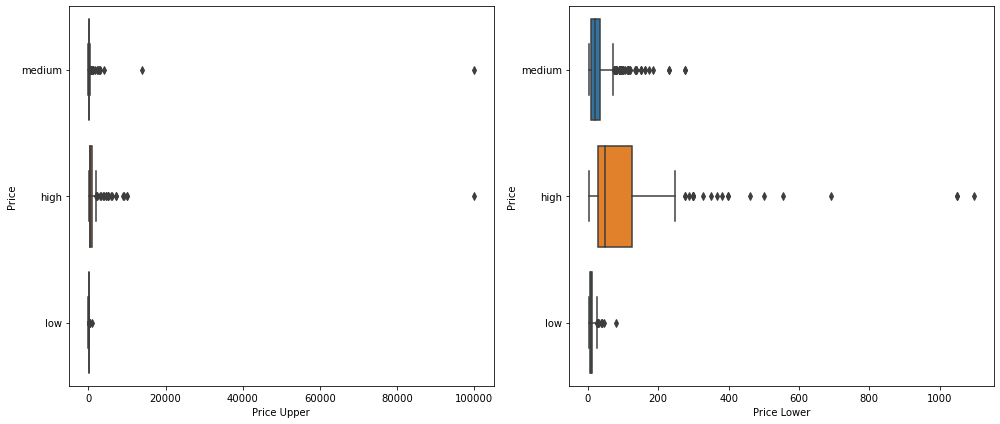

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,6), tight_layout = True)
sns.boxplot(data = rest, x = 'Price Upper', y = 'Price', ax = ax1)
sns.boxplot(data = rest, x = 'Price Lower', y = 'Price', ax = ax2)
plt.show()

From boxplot, extreme outliers can be identified in the dataset Price Upper > 10000, and Price Lower > 1000. rows with these values will be removed.

In [25]:
rest[(rest['Price Upper'] > 10000) | (rest['Price Lower'] > 1000)]

,Rating,Total Rating,Price,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper
171,4.5,180.0,high,"[Japanese, Seafood, Sushi, Asian]",None,"[Lunch, Dinner]","[Reservations, Private Dining, Seating, Parkin...",Kuala Lumpur,156.0,"[As I walked into Sushi Oribe, I could immedia...",1050.0,3223.0
555,4.5,25.0,medium,[Chinese],None,"[Lunch, Dinner]","[Reservations, Private Dining, Seating, Table ...",Kuala Lumpur,19.0,[This is one of the best dim sum place in town...,92.0,13815.0
2544,NaN,NaN,high,"[Japanese, Sushi, Kaiseki]",None,"[Lunch, Dinner, Brunch]","[Reservations, Private Dining, Seating, Parkin...",Kuala Lumpur,NaN,None,1050.0,4559.0
2808,4.0,5.0,medium,"[Chinese, Pizza, Cafe, Fast food, Asian]",None,"[Lunch, Dinner, After-hours, Drinks]",None,Johor Bahru,5.0,[Great bar with the choices of a draft beer ...,10.0,99999.0
2858,4.0,5.0,high,"[Indian, Southwestern, Barbecue, Asian, Wine Bar]",None,"[Lunch, Dinner, After-hours, Drinks]","[Delivery, Reservations, Outdoor Seating, Buff...",Johor Bahru,5.0,[We were a group of eight dining out for a bir...,10.0,100000.0
3877,5.0,5.0,high,[Japanese],None,"[Lunch, Dinner]","[Reservations, Private Dining, Parking Availab...",Penang,4.0,[This hidden gem can be found at Straits Quay....,1098.0,5945.0


In [26]:
#Removing data with extreme outliers
subset = rest[(rest['Price Upper'] > 10000) | (rest['Price Lower'] > 1000)]
subset

rest = rest.drop(subset.index)
rest = rest.reset_index(drop = True)
rest

,Rating,Total Rating,Price,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper
0,4.5,7.0,medium,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,[Good place and nice food \nRecommended 👍🏻I fe...,20.0,200.0
1,5.0,882.0,high,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,[At Hilton Kuala Lumpur over the weekend and d...,NaN,NaN
2,4.5,1278.0,high,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,"[Tried their sashimi set, fresh and in great p...",50.0,100.0
3,4.5,1512.0,high,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,"[Nice ambience, nice food, amazing service esp...",NaN,NaN
4,5.0,1934.0,medium,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,"[Lovely place, really chilled and friendly sta...",6.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4973,NaN,NaN,medium,"[Japanese, Barbecue]",None,None,[Reservations],Petaling Jaya,NaN,None,50.0,70.0
4974,NaN,NaN,low,"[American, Asian, British, Australian, Malaysian]",None,None,None,Petaling Jaya,NaN,None,15.0,62.0
4975,NaN,NaN,low,"[Japanese, Asian]",None,None,None,Petaling Jaya,NaN,None,10.0,35.0
4976,NaN,NaN,high,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,NaN,None,NaN,NaN


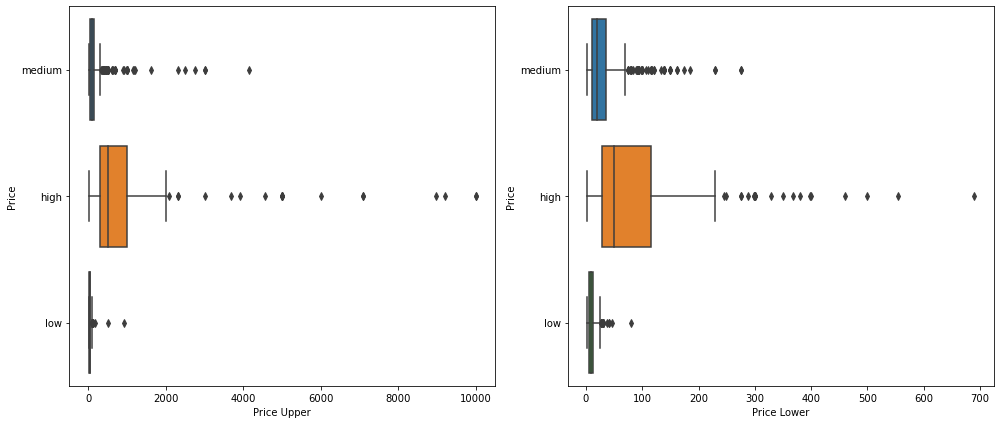

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,6), tight_layout = True)
sns.boxplot(data = rest, x = 'Price Upper', y = 'Price', ax = ax1)
sns.boxplot(data = rest, x = 'Price Lower', y = 'Price', ax = ax2)

plt.show()

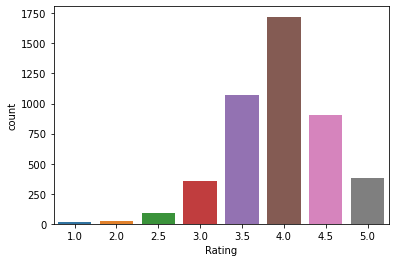

In [28]:
sns.countplot(data = rest, x = 'Rating')
plt.show()

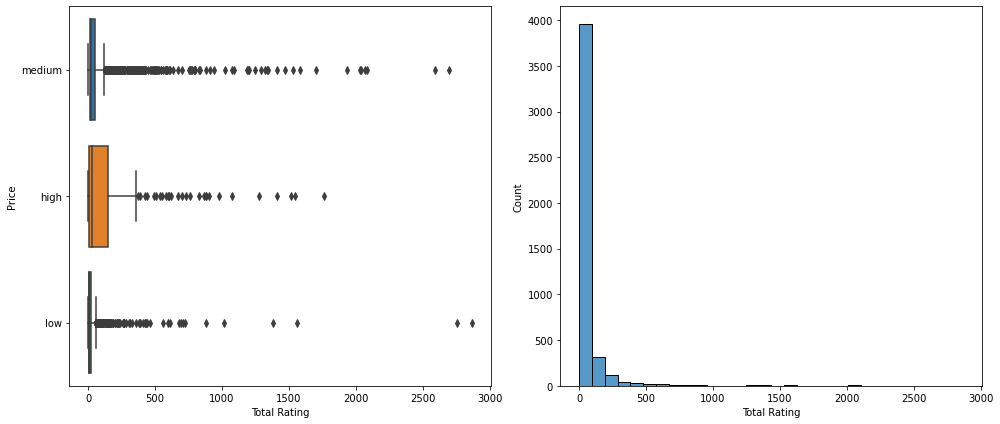

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,6), tight_layout = True)
sns.boxplot(data = rest, x = 'Total Rating', y = 'Price', ax = ax1)
sns.histplot(rest['Total Rating'], ax = ax2, bins = 30)

plt.show()

## Type of noise in the reviews

In [30]:
rest.loc[0,'Review']

['Good place and nice food \nRecommended 👍🏻I feel that the places is kinda comfortable and waiter is so helpful to introduce food category to us . Well done !',
 'This restaurant features sushi and grilled fishes. I tried their lunch donburi menu. The set comes with miso soup, steamed egg and small appetizer. The portion is not big and only a few thiny sliced salmon pieces were on top of rice. Compared with the volume of rice portion, fish slice portion is so little. The price is not very cheap. The restaurant looked empty compared with others on the same floor. Not so recommended.',
 'Visited the restaurant 3 times and they never disappoint! Love every meal I ordered from them - their Yokozuna set with uni was da bomb dot com, the salmon don was really good too but the highlight of my meal was their Hokkaido oysters. Just arrived from Japan at midnight, and I had it for dinner the same day. It was thick, fresh, very juicy with a fatty layer. Best oysters in town!',
 'Really fresh Japa

In [31]:
rest.loc[1,'Review']

['At Hilton Kuala Lumpur over the weekend and decided to try out Chamber’s Grill for the very first time. We had Scallops and Caesar’s Salad for starters and Angus Ribeye for the main dish.Very well prepared and staff were courteous and pleasant. We will definitely come again!',
 'It was a wonderful dinner and great, intimate environment. The staff was attentive and knowledgeable about the menu and wine pairings.',
 'Fantastic evening with Raja Adli and his team. Food and service was top quality. Very courteous bunch of folks here. Thoroughly enjoyed ourselves. Will be back for more!',
 'Great food. Great experience. Wonderful host. Kudos to team Adli, Thanga and Chef Anil. We came for our daughter’s exam celebration and they gave her a surprise congratulatory cake! \n\nTomahawk Wagyu is one of the best in KL.',
 'I had dinner at chambers grill and I was fascinated by their service at this restaurant the server Thanga and akmal was very very attentive to us shout out to you guys as for

Emojis, punctuation, \n characters, mandarin words may exist (due to it being malaysian restaurant)

In [32]:
#%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [33]:
def reviewCleaning1(reviewList): #Mandarin words, and \n. keep everything else
    if reviewList:
        rev = []
        for review in reviewList:
            mandarin_pattern = re.compile(r'[\u4e00-\u9fff]+')
            cleaned_text = mandarin_pattern.sub('', review).replace('\n', ' ')
            rev.append(cleaned_text)
        return rev

In [34]:
def reviewCleaning2(reviewList): #Remove everything, only keep alphabets and numbers
    #Removing Symbols, etc (Non Characters, Numbers, and "_")
    if reviewList:
        rev = []
        for review in reviewList:
            tokens = re.findall(r'[A-Za-z0-9_]+', review)
            review = ' '.join(tokens)
            rev.append(review.lower())
        return rev

In [35]:
rest['Review2'] = list(map(reviewCleaning1, rest['Review']))
rest['Review'] = list(map(reviewCleaning2, rest['Review']))

In [36]:
rest['Review'][10]

['good spread with reasonable price helpful staff especially sathish eduardo will definitely come again',
 'the food was delightful excellent service from nurul at the counter would come again for another makan makan',
 'food was very decent and yummy good variety cuisine food staff also friendly and kind definitely would come back to visit',
 'was here for buffet dinner as the birthday celebration wide spread of food selection including fresh oysters and crab suggest to come on thursday to avoid the huge crowd during weekend kudos to the crews satis nurul yazed and eddie for being very attentive in delivering their service',
 'lovely foods with nice presentation wow with superb service by ms yuvanes friendly staff that have to give a big compliment',
 'we celebrate my husband advance birthday at latest recipe and my family enjoyed the foods so much staffs are friendly foods also lot of variety special thanks to nurul yazid for remembering my husband birthday and she gave a slice of ca

In [37]:
rest['Review2'][10]

['Good spread with reasonable price. Helpful staff especially Sathish & Eduardo. Will definitely come again',
 'The food was delightful. Excellent service from Nurul at the counter. Would come again for another makan-makan.',
 'food was very decent and yummy ! good variety cuisine food ❤️  staff also friendly and kind   definitely would come back to visit ! ❤️',
 'Was here for buffet dinner as the birthday celebration. Wide spread of food selection including fresh oysters and crab.  Suggest to come on Thursday to avoid the huge crowd during weekend.   Kudos to the crews, Satis, Nurul, Yazed and Eddie for being very attentive in delivering their service.',
 'Lovely foods with nice presentation. Wow with superb service by Ms Yuvanes. Friendly staff that have to give a big compliment.',
 'We celebrate my husband advance birthday at Latest Recipe and my family enjoyed the foods so much. Staffs are friendly,  foods also lot of variety.  Special thanks to Nurul Yazid for remembering my husba

In [38]:
#Review Stemming
porter = PorterStemmer()
def reviewStemming(reviewList):
    #Performing Stemming with Porter Stemmer
    if reviewList:
        revList = []
        for review in reviewList:
            tokens = review.split()
            eachReview = []
            for token in tokens:
                eachReview.append(porter.stem(token))
            stemmed = ' '.join(eachReview)
            revList.append(stemmed)
        return revList

In [39]:
stemmedlist = list(map(reviewStemming, rest['Review']))

In [40]:
stemmedlist[5]

['good food warm servic good food warm servic good food warm servic good food warm servic good food and warm servic',
 'great servic by farah she wa attent and help when we want vegetarian option if you re look to share with the famili the portion are good the pizza are a must have thin crust with adequ fill',
 'the food is so good i love the arrancini ball the staff is veri nice and the owner too thank you farrah for take care of us',
 'had the soft shell crab pasta bruschetta and anoth pasta food came out fast and the server were veri attent price wa also veri reason',
 'we ve had a great experi here the food wa all veri delici and the waiter wa veri profession and kind highli recommend',
 'we enjoy the food especi not my first time alway love their fettuccin carbonara ms farah ha been veri attent and friendli toward me while i wa wait for my sister',
 'first time dinner here with my friend from sg great place to hangout would rate 4 5 for the delici food that i order which is spaghe

In [41]:
rest.loc[5,'Review']

['good food warm services good food warm services good food warm services good food warm services good food and warm services',
 'great service by farah she was attentive and helpful when we wanted vegetarian options if you re looking to share with the family the portions are good the pizzas are a must have thin crusts with adequate filling',
 'the food is so good i loved the arrancini balls the staff is very nice and the owner too thank you farrah for taking care of us',
 'had the soft shell crab pasta bruschetta and another pasta food came out fast and the servers were very attentive price was also very reasonable',
 'we ve had a great experience here the food was all very delicious and the waiter was very professional and kind highly recommend',
 'we enjoyed the food especially not my first time always love their fettuccine carbonara ms farah has been very attentive and friendly towards me while i was waiting for my sisters',
 'first time dinner here with my friends from sg great pl

In [42]:
#Get the wordnet part of speech
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [43]:
#Review Lemmatization with POS
lemmatizer = WordNetLemmatizer()
def reviewLemmatizer(reviewList):
    #Performing Lemmatization with WordNetLemmatizer
    if reviewList:
        revList = []
        for review in reviewList:
            tokens = review.split()
            eachReview = []
            words_and_tags = nltk.pos_tag(tokens)
            for word,tag in words_and_tags:
                lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
                eachReview.append(lemma)
            lemmatized = ' '.join(eachReview)
            revList.append(lemmatized)
        return revList

In [44]:
lemmatizedlist = list(map(reviewLemmatizer, rest['Review']))

In [45]:
rest['Review'][10][:5]

['good spread with reasonable price helpful staff especially sathish eduardo will definitely come again',
 'the food was delightful excellent service from nurul at the counter would come again for another makan makan',
 'food was very decent and yummy good variety cuisine food staff also friendly and kind definitely would come back to visit',
 'was here for buffet dinner as the birthday celebration wide spread of food selection including fresh oysters and crab suggest to come on thursday to avoid the huge crowd during weekend kudos to the crews satis nurul yazed and eddie for being very attentive in delivering their service',
 'lovely foods with nice presentation wow with superb service by ms yuvanes friendly staff that have to give a big compliment']

In [46]:
lemmatizedlist[10][:5]

['good spread with reasonable price helpful staff especially sathish eduardo will definitely come again',
 'the food be delightful excellent service from nurul at the counter would come again for another makan makan',
 'food be very decent and yummy good variety cuisine food staff also friendly and kind definitely would come back to visit',
 'be here for buffet dinner a the birthday celebration wide spread of food selection include fresh oyster and crab suggest to come on thursday to avoid the huge crowd during weekend kudos to the crew satis nurul yazed and eddie for be very attentive in deliver their service',
 'lovely food with nice presentation wow with superb service by ms yuvanes friendly staff that have to give a big compliment']

In [47]:
len(lemmatizedlist)

4978

In [48]:
len(stemmedlist)

4978

In [49]:
rest['Stemmed'] = stemmedlist
rest['Lemmatized'] = lemmatizedlist

In [50]:
rest

,Rating,Total Rating,Price,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper,Review2,Stemmed,Lemmatized
0,4.5,7.0,medium,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,[good place and nice food recommended i feel t...,20.0,200.0,[Good place and nice food Recommended 👍🏻I fee...,[good place and nice food recommend i feel tha...,[good place and nice food recommend i feel tha...
1,5.0,882.0,high,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,[at hilton kuala lumpur over the weekend and d...,NaN,NaN,[At Hilton Kuala Lumpur over the weekend and d...,[at hilton kuala lumpur over the weekend and d...,[at hilton kuala lumpur over the weekend and d...
2,4.5,1278.0,high,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,[tried their sashimi set fresh and in great po...,50.0,100.0,"[Tried their sashimi set, fresh and in great p...",[tri their sashimi set fresh and in great port...,[try their sashimi set fresh and in great port...
3,4.5,1512.0,high,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,[nice ambience nice food amazing service esp f...,NaN,NaN,"[Nice ambience, nice food, amazing service esp...",[nice ambienc nice food amaz servic esp from a...,[nice ambience nice food amaze service esp fro...
4,5.0,1934.0,medium,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,[lovely place really chilled and friendly staf...,6.0,50.0,"[Lovely place, really chilled and friendly sta...",[love place realli chill and friendli staff li...,[lovely place really chill and friendly staff ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,NaN,NaN,medium,"[Japanese, Barbecue]",None,None,[Reservations],Petaling Jaya,NaN,None,50.0,70.0,None,None,None
4974,NaN,NaN,low,"[American, Asian, British, Australian, Malaysian]",None,None,None,Petaling Jaya,NaN,None,15.0,62.0,None,None,None
4975,NaN,NaN,low,"[Japanese, Asian]",None,None,None,Petaling Jaya,NaN,None,10.0,35.0,None,None,None
4976,NaN,NaN,high,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,NaN,None,NaN,NaN,None,None,None


In [51]:
#Sentiment Analysis Using VADER Sentiment Scoring
#With Bag of Word approach, VADER removes stop words, deals with noise like punctuation, emojis, etc
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [53]:
#Perform Sentiment Scoring with VADER
#Only Score if there are three or more reviews
def sentimentScoring(reviewList):
    if reviewList and len(reviewList)>=1:
        scores = []
        for review in reviewList:
            score = sia.polarity_scores(review)['compound']
            scores.append(score)
        scores = np.array(scores)
        return scores.mean()

In [54]:
rest['Stemmed Score'] = list(map(sentimentScoring, rest['Stemmed']))
rest['Lemmatized Score'] = list(map(sentimentScoring, rest['Lemmatized']))
rest['Review2 Score'] = list(map(sentimentScoring, rest['Review2']))

In [55]:
rest

,Rating,Total Rating,Price,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Review,Price Lower,Price Upper,Review2,Stemmed,Lemmatized,Stemmed Score,Lemmatized Score,Review2 Score
0,4.5,7.0,medium,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,[good place and nice food recommended i feel t...,20.0,200.0,[Good place and nice food Recommended 👍🏻I fee...,[good place and nice food recommend i feel tha...,[good place and nice food recommend i feel tha...,0.594886,0.593386,0.568929
1,5.0,882.0,high,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,[at hilton kuala lumpur over the weekend and d...,NaN,NaN,[At Hilton Kuala Lumpur over the weekend and d...,[at hilton kuala lumpur over the weekend and d...,[at hilton kuala lumpur over the weekend and d...,0.778060,0.918213,0.915253
2,4.5,1278.0,high,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,[tried their sashimi set fresh and in great po...,50.0,100.0,"[Tried their sashimi set, fresh and in great p...",[tri their sashimi set fresh and in great port...,[try their sashimi set fresh and in great port...,0.701087,0.855820,0.843800
3,4.5,1512.0,high,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,[nice ambience nice food amazing service esp f...,NaN,NaN,"[Nice ambience, nice food, amazing service esp...",[nice ambienc nice food amaz servic esp from a...,[nice ambience nice food amaze service esp fro...,0.789620,0.917933,0.922020
4,5.0,1934.0,medium,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,[lovely place really chilled and friendly staf...,6.0,50.0,"[Lovely place, really chilled and friendly sta...",[love place realli chill and friendli staff li...,[lovely place really chill and friendly staff ...,0.787660,0.866067,0.885373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,NaN,NaN,medium,"[Japanese, Barbecue]",None,None,[Reservations],Petaling Jaya,NaN,None,50.0,70.0,None,None,None,NaN,NaN,NaN
4974,NaN,NaN,low,"[American, Asian, British, Australian, Malaysian]",None,None,None,Petaling Jaya,NaN,None,15.0,62.0,None,None,None,NaN,NaN,NaN
4975,NaN,NaN,low,"[Japanese, Asian]",None,None,None,Petaling Jaya,NaN,None,10.0,35.0,None,None,None,NaN,NaN,NaN
4976,NaN,NaN,high,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,NaN,None,NaN,NaN,None,None,None,NaN,NaN,NaN


In [56]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rating                4557 non-null   float64
 1   Total Rating          4557 non-null   float64
 2   Price                 4978 non-null   object 
 3   Cuisines              4730 non-null   object 
 4   Special Diets         1244 non-null   object 
 5   Meals                 3821 non-null   object 
 6   Features              3557 non-null   object 
 7   Location              4978 non-null   object 
 8   Total English Review  4532 non-null   float64
 9   Review                3820 non-null   object 
 10  Price Lower           2145 non-null   float64
 11  Price Upper           2145 non-null   float64
 12  Review2               3820 non-null   object 
 13  Stemmed               3820 non-null   object 
 14  Lemmatized            3820 non-null   object 
 15  Stemmed Score        

In [57]:
#Drop some columns no longer used
rest = rest.drop(columns = ['Stemmed', 'Lemmatized','Review', 'Review2'])

In [58]:
clean = rest
clean

,Rating,Total Rating,Price,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Price Lower,Price Upper,Stemmed Score,Lemmatized Score,Review2 Score
0,4.5,7.0,medium,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,20.0,200.0,0.594886,0.593386,0.568929
1,5.0,882.0,high,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,NaN,NaN,0.778060,0.918213,0.915253
2,4.5,1278.0,high,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,50.0,100.0,0.701087,0.855820,0.843800
3,4.5,1512.0,high,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,NaN,NaN,0.789620,0.917933,0.922020
4,5.0,1934.0,medium,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,6.0,50.0,0.787660,0.866067,0.885373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,NaN,NaN,medium,"[Japanese, Barbecue]",None,None,[Reservations],Petaling Jaya,NaN,50.0,70.0,NaN,NaN,NaN
4974,NaN,NaN,low,"[American, Asian, British, Australian, Malaysian]",None,None,None,Petaling Jaya,NaN,15.0,62.0,NaN,NaN,NaN
4975,NaN,NaN,low,"[Japanese, Asian]",None,None,None,Petaling Jaya,NaN,10.0,35.0,NaN,NaN,NaN
4976,NaN,NaN,high,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,NaN,NaN,NaN,NaN,NaN,NaN


## Filling Missing Values - Numerical Columns

In [59]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rating                4557 non-null   float64
 1   Total Rating          4557 non-null   float64
 2   Price                 4978 non-null   object 
 3   Cuisines              4730 non-null   object 
 4   Special Diets         1244 non-null   object 
 5   Meals                 3821 non-null   object 
 6   Features              3557 non-null   object 
 7   Location              4978 non-null   object 
 8   Total English Review  4532 non-null   float64
 9   Price Lower           2145 non-null   float64
 10  Price Upper           2145 non-null   float64
 11  Stemmed Score         3820 non-null   float64
 12  Lemmatized Score      3820 non-null   float64
 13  Review2 Score         3820 non-null   float64
dtypes: float64(8), object(6)
memory usage: 544.6+ KB


In [60]:
clean['Rating'].value_counts()

4.0    1722
3.5    1071
4.5     903
5.0     385
3.0     355
2.5      87
2.0      20
1.0      14
Name: Rating, dtype: int64

In [61]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rating                4557 non-null   float64
 1   Total Rating          4557 non-null   float64
 2   Price                 4978 non-null   object 
 3   Cuisines              4730 non-null   object 
 4   Special Diets         1244 non-null   object 
 5   Meals                 3821 non-null   object 
 6   Features              3557 non-null   object 
 7   Location              4978 non-null   object 
 8   Total English Review  4532 non-null   float64
 9   Price Lower           2145 non-null   float64
 10  Price Upper           2145 non-null   float64
 11  Stemmed Score         3820 non-null   float64
 12  Lemmatized Score      3820 non-null   float64
 13  Review2 Score         3820 non-null   float64
dtypes: float64(8), object(6)
memory usage: 544.6+ KB


In [62]:
# Filling Missing Values
clean['Rating'] = clean['Rating'].fillna(4) #Mode
clean['Total English Review'] = clean['Total English Review'].fillna(round(clean['Total English Review'].mean())) #Mean
clean['Total Rating'] = clean['Total Rating'].fillna(round(clean['Total Rating'].mean()))
clean['Stemmed Score'] = clean['Stemmed Score'].fillna(clean['Stemmed Score'].mean()) #Mean
clean['Lemmatized Score'] = clean['Lemmatized Score'].fillna(clean['Lemmatized Score'].mean()) #Mean
clean['Review2 Score'] = clean['Review2 Score'].fillna(clean['Review2 Score'].mean()) #Mean

In [63]:
clean.info() #Price Lower and Upper is not used in the modelling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rating                4978 non-null   float64
 1   Total Rating          4978 non-null   float64
 2   Price                 4978 non-null   object 
 3   Cuisines              4730 non-null   object 
 4   Special Diets         1244 non-null   object 
 5   Meals                 3821 non-null   object 
 6   Features              3557 non-null   object 
 7   Location              4978 non-null   object 
 8   Total English Review  4978 non-null   float64
 9   Price Lower           2145 non-null   float64
 10  Price Upper           2145 non-null   float64
 11  Stemmed Score         4978 non-null   float64
 12  Lemmatized Score      4978 non-null   float64
 13  Review2 Score         4978 non-null   float64
dtypes: float64(8), object(6)
memory usage: 544.6+ KB


In [64]:
clean.describe()

,Rating,Total Rating,Total English Review,Price Lower,Price Upper,Stemmed Score,Lemmatized Score,Review2 Score
count,4978.000000,4978.000000,4978.000000,2145.000000,2145.000000,4978.000000,4978.000000,4978.000000
mean,3.946464,61.914223,54.926075,25.910023,171.726807,0.580236,0.626952,0.616044
std,0.570697,164.499667,144.229613,45.521961,611.289411,0.257753,0.288472,0.296611
min,1.000000,1.000000,1.000000,2.000000,5.000000,-0.977400,-0.987200,-0.984600
25%,3.500000,8.000000,8.000000,8.000000,30.000000,0.519722,0.573375,0.561664
50%,4.000000,21.000000,19.000000,13.000000,50.000000,0.580236,0.626952,0.616044
75%,4.500000,62.000000,55.000000,23.000000,100.000000,0.743369,0.828902,0.823190
max,5.000000,2868.000000,2609.000000,690.000000,10000.000000,0.995300,0.997100,0.997200


## Exploding columns with list data into one column each

In [65]:
#Creating frequency tables for the list columns (Cuisines, Diets, Meal, Features)
allCuisine = []
allDiet = []
allMeal = []
allFeature = []
for x in clean[~clean['Cuisines'].isna()]['Cuisines']:
    for cuisine in x:
        allCuisine.append(cuisine)

for x in clean[~clean['Special Diets'].isna()]['Special Diets']:
    for diet in x:
        allDiet.append(diet)
        
for x in clean[~clean['Meals'].isna()]['Meals']:
    for meal in x:
        allMeal.append(meal)
        
for x in clean[~clean['Features'].isna()]['Features']:
    for feature in x:
        allFeature.append(feature)

In [66]:
allCuisine = pd.Series(allCuisine)
allDiet = pd.Series(allDiet)
allMeal = pd.Series(allMeal)
allFeature = pd.Series(allFeature)

In [67]:
allCuisine = allCuisine.value_counts().reset_index()
allDiet = allDiet.value_counts().reset_index()
allMeal = allMeal.value_counts().reset_index()
allFeature = allFeature.value_counts().reset_index()

In [68]:
def getPercent(x):
    return round(x / 4978 * 100, 2)

In [69]:
allCuisine['Percent'] = allCuisine[0].apply(getPercent)
allFeature['Percent'] = allFeature[0].apply(getPercent)
allDiet['Percent'] = allDiet[0].apply(getPercent)
allMeal['Percent'] = allMeal[0].apply(getPercent)

In [70]:
len(allCuisine)

121

In [71]:
allCuisine

,index,0,Percent
0,Asian,2660,53.44
1,Malaysian,1493,29.99
2,Chinese,1093,21.96
3,Cafe,550,11.05
4,Japanese,431,8.66
...,...,...,...
116,Slovenian,1,0.02
117,Yunnan,1,0.02
118,Venezuelan,1,0.02
119,Kappo,1,0.02


In [72]:
allDiet

,index,0,Percent
0,Vegetarian Friendly,969,19.47
1,Vegan Options,518,10.41
2,Halal,495,9.94
3,Gluten Free Options,191,3.84


In [73]:
allMeal

,index,0,Percent
0,Dinner,3443,69.16
1,Lunch,3292,66.13
2,Brunch,1247,25.05
3,Breakfast,974,19.57
4,Drinks,817,16.41
5,After-hours,503,10.10


In [74]:
allFeature

,index,0,Percent
0,Seating,2919,58.64
1,Reservations,2436,48.94
2,Table Service,2281,45.82
3,Takeout,2042,41.02
4,Wheelchair Accessible,1166,23.42
5,Serves Alcohol,1143,22.96
6,Free Wifi,913,18.34
7,Parking Available,835,16.77
8,Highchairs Available,809,16.25
9,Accepts Credit Cards,801,16.09


In [75]:
print(list(allFeature['index']))

['Seating', 'Reservations', 'Table Service', 'Takeout', 'Wheelchair Accessible', 'Serves Alcohol', 'Free Wifi', 'Parking Available', 'Highchairs Available', 'Accepts Credit Cards', 'Outdoor Seating', 'Street Parking', 'Wine and Beer', 'Delivery', 'Accepts Visa', 'Accepts Mastercard', 'Full Bar', 'Private Dining', 'Digital Payments', 'Cash Only', 'Television', 'Free off-street parking', 'Family style', 'Buffet', 'Valet Parking', 'Non-smoking restaurants', 'Validated Parking', 'Accepts American Express', 'Live Music', 'Gift Cards Available', 'Dog Friendly', 'Waterfront', 'BYOB', 'Jazz Bar', 'Drive Thru', 'Sports bars', 'Accepts Discover', 'Playgrounds', 'Beach']


In [76]:
clean

,Rating,Total Rating,Price,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Price Lower,Price Upper,Stemmed Score,Lemmatized Score,Review2 Score
0,4.5,7.0,medium,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,20.0,200.0,0.594886,0.593386,0.568929
1,5.0,882.0,high,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,NaN,NaN,0.778060,0.918213,0.915253
2,4.5,1278.0,high,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,50.0,100.0,0.701087,0.855820,0.843800
3,4.5,1512.0,high,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,NaN,NaN,0.789620,0.917933,0.922020
4,5.0,1934.0,medium,"[Bar, International, Grill, Gastropub]","[Vegetarian Friendly, Halal]","[Lunch, Dinner, After-hours, Drinks]","[Takeout, Reservations, Outdoor Seating, Seati...",Kuala Lumpur,1772.0,6.0,50.0,0.787660,0.866067,0.885373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,4.0,62.0,medium,"[Japanese, Barbecue]",None,None,[Reservations],Petaling Jaya,55.0,50.0,70.0,0.580236,0.626952,0.616044
4974,4.0,62.0,low,"[American, Asian, British, Australian, Malaysian]",None,None,None,Petaling Jaya,55.0,15.0,62.0,0.580236,0.626952,0.616044
4975,4.0,62.0,low,"[Japanese, Asian]",None,None,None,Petaling Jaya,55.0,10.0,35.0,0.580236,0.626952,0.616044
4976,4.0,62.0,high,"[Chinese, Asian]",None,"[Breakfast, Lunch, Dinner, Brunch]","[Reservations, Private Dining, Valet Parking, ...",Petaling Jaya,55.0,NaN,NaN,0.580236,0.626952,0.616044


In [77]:
# Creating new columns
for y in allMeal['index']:
    clean[y] = None
for y in allDiet['index']:
    clean[y] = None
for y in allCuisine['index']:
    clean[y] = None
for y in allFeature['index']:
    clean[y] = None

C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean[y] = None
C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean[y] = None
C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean[y] = None
C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean[y] = None
C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean[y] = None
C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean[y] = None
C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\danie\AppData\Local\Temp/ipykernel_13240/3634659020.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean[y] = None


In [78]:
clean

,Rating,Total Rating,Price,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Price Lower,Price Upper,Stemmed Score,Lemmatized Score,Review2 Score,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
0,4.5,7.0,medium,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,20.0,200.0,0.594886,0.593386,0.568929,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,5.0,882.0,high,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,NaN,NaN,0.778060,0.918213,0.915253,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [79]:
# Filling columns with 0s and 1s
for x in range(len(clean)):
    if clean.loc[x,'Meals']:
        for y in allMeal['index']:
            if y in clean.loc[x, 'Meals']:
                clean.loc[x,y] = 1
            else:
                clean.loc[x,y] = 0
    
    if clean.loc[x,'Special Diets']:
        for y in allDiet['index']:
            if y in clean.loc[x, 'Special Diets']:
                clean.loc[x,y] = 1
            else:
                clean.loc[x,y] = 0
    
    if clean.loc[x,'Features']:
        for y in allFeature['index']:
            if y in clean.loc[x, 'Features']:
                clean.loc[x,y] = 1
            else:
                clean.loc[x,y] = 0
        
    if clean.loc[x,'Cuisines']:
        for y in allCuisine['index']:
            if y in clean.loc[x, 'Cuisines']:
                clean.loc[x,y] = 1
            else:
                clean.loc[x,y] = 0

In [80]:
clean.info(show_counts = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 184 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    Rating                    4978 non-null   float64
 1    Total Rating              4978 non-null   float64
 2    Price                     4978 non-null   object 
 3    Cuisines                  4730 non-null   object 
 4    Special Diets             1244 non-null   object 
 5    Meals                     3821 non-null   object 
 6    Features                  3557 non-null   object 
 7    Location                  4978 non-null   object 
 8    Total English Review      4978 non-null   float64
 9    Price Lower               2145 non-null   float64
 10   Price Upper               2145 non-null   float64
 11   Stemmed Score             4978 non-null   float64
 12   Lemmatized Score          4978 non-null   float64
 13   Review2 Score             4978 non-null   floa

In [81]:
list(allDiet['index'])

['Vegetarian Friendly', 'Vegan Options', 'Halal', 'Gluten Free Options']

In [82]:
clean

,Rating,Total Rating,Price,Cuisines,Special Diets,Meals,Features,Location,Total English Review,Price Lower,Price Upper,Stemmed Score,Lemmatized Score,Review2 Score,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
0,4.5,7.0,medium,"[Japanese, Seafood, Sushi]",None,"[Lunch, Dinner, Drinks]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,7.0,20.0,200.0,0.594886,0.593386,0.568929,1,1,0,0,1,0,None,None,None,None,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,882.0,high,"[Steakhouse, Grill]",[Gluten Free Options],[Dinner],"[Reservations, Seating, Parking Available, Val...",Kuala Lumpur,870.0,NaN,NaN,0.778060,0.918213,0.915253,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,4.5,1278.0,high,"[Japanese, Sushi, Asian, Fusion]","[Vegetarian Friendly, Vegan Options, Gluten Fr...","[Lunch, Dinner, Drinks]","[Delivery, Takeout, Outdoor Seating, Seating, ...",Kuala Lumpur,1216.0,50.0,100.0,0.701087,0.855820,0.843800,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,4.5,1512.0,high,"[Japanese, Seafood, Sushi, Asian]","[Vegetarian Friendly, Vegan Options, Halal, Gl...","[Lunch, Dinner]","[Takeout, Reservations, Private Dining, Seatin...",Kuala Lumpur,1455.0,NaN,NaN,0.789620,0.917933,0.922020,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [83]:
clean.iloc[:,14:]

,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
0,1,1,0,0,1,0,None,None,None,None,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [84]:
#Replacing missing data
#Special Diets if missing, replace with 0 (assume not providing, because of small available data / huge missing)
#Other columns follow the mode (because have a lot of existing data)
colUsed = list(clean.iloc[:,14:].columns)
colUsed
del colUsed[6:10]
mode = clean.filter(colUsed).mode()
mode

,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
#Fill missing values
clean[colUsed] = clean[colUsed].fillna(clean.mode().iloc[0])
clean[list(allDiet['index'])] = clean[list(allDiet['index'])].fillna(0)

In [86]:
clean.drop(columns = ['Cuisines', 'Special Diets', 'Meals', 'Features', 'Total English Review'], inplace = True)

In [87]:
clean

,Rating,Total Rating,Price,Location,Price Lower,Price Upper,Stemmed Score,Lemmatized Score,Review2 Score,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
0,4.5,7.0,medium,Kuala Lumpur,20.0,200.0,0.594886,0.593386,0.568929,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,882.0,high,Kuala Lumpur,NaN,NaN,0.778060,0.918213,0.915253,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,4.5,1278.0,high,Kuala Lumpur,50.0,100.0,0.701087,0.855820,0.843800,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,4.5,1512.0,high,Kuala Lumpur,NaN,NaN,0.789620,0.917933,0.922020,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,5.0,1934.0,medium,Kuala Lumpur,6.0,50.0,0.787660,0.866067,0.885373,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,.

In [88]:
clean.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 179 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    Rating                    4978 non-null   float64
 1    Total Rating              4978 non-null   float64
 2    Price                     4978 non-null   object 
 3    Location                  4978 non-null   object 
 4    Price Lower               2145 non-null   float64
 5    Price Upper               2145 non-null   float64
 6    Stemmed Score             4978 non-null   float64
 7    Lemmatized Score          4978 non-null   float64
 8    Review2 Score             4978 non-null   float64
 9    Dinner                    4978 non-null   int64  
 10   Lunch                     4978 non-null   int64  
 11   Brunch                    4978 non-null   int64  
 12   Breakfast                 4978 non-null   int64  
 13   Drinks                    4978 non-null   int6

In [89]:
clean #Ready for data viz

,Rating,Total Rating,Price,Location,Price Lower,Price Upper,Stemmed Score,Lemmatized Score,Review2 Score,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
0,4.5,7.0,medium,Kuala Lumpur,20.0,200.0,0.594886,0.593386,0.568929,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,882.0,high,Kuala Lumpur,NaN,NaN,0.778060,0.918213,0.915253,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,4.5,1278.0,high,Kuala Lumpur,50.0,100.0,0.701087,0.855820,0.843800,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,4.5,1512.0,high,Kuala Lumpur,NaN,NaN,0.789620,0.917933,0.922020,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,5.0,1934.0,medium,Kuala Lumpur,6.0,50.0,0.787660,0.866067,0.885373,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,.

# Data Visualization

In [90]:
clean

,Rating,Total Rating,Price,Location,Price Lower,Price Upper,Stemmed Score,Lemmatized Score,Review2 Score,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
0,4.5,7.0,medium,Kuala Lumpur,20.0,200.0,0.594886,0.593386,0.568929,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,882.0,high,Kuala Lumpur,NaN,NaN,0.778060,0.918213,0.915253,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,4.5,1278.0,high,Kuala Lumpur,50.0,100.0,0.701087,0.855820,0.843800,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,4.5,1512.0,high,Kuala Lumpur,NaN,NaN,0.789620,0.917933,0.922020,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,5.0,1934.0,medium,Kuala Lumpur,6.0,50.0,0.787660,0.866067,0.885373,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,.

## The distribution of Price

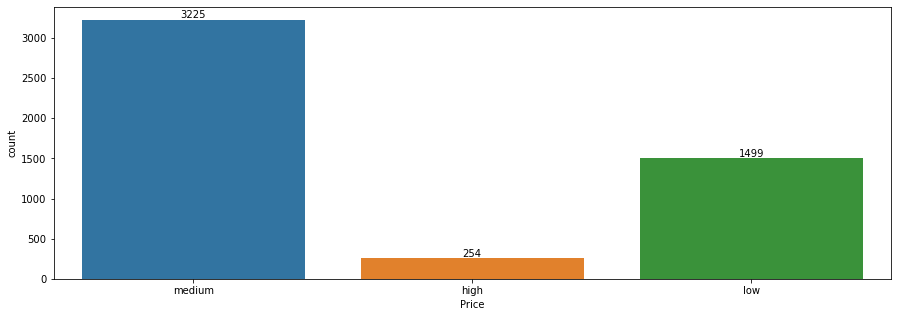

In [91]:
plt.figure(figsize = (15,5))
a1 = sns.countplot(x = 'Price', data = clean)
for i in a1.containers:
    a1.bar_label(i,)
plt.show()

The majority restaurant listings fall under the medium price category at 3225, followed by low at 1499, and high at 254.

From this we can see that the dataset is imbalanced, and that over sampling needs to be performed in model training stage.

## The distribution of Location

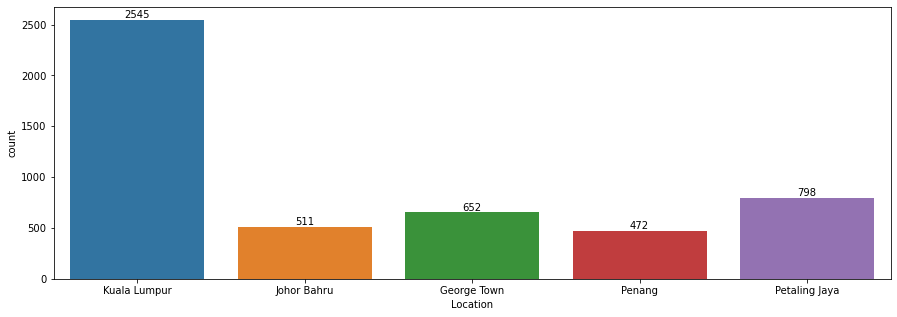

In [92]:
plt.figure(figsize = (15,5))
a1 = sns.countplot(x = 'Location', data = clean)
for i in a1.containers:
    a1.bar_label(i,)
plt.show()

The majority restaurant listings come from Kuala Lumpur at 2545, followed by PJ at 798, George town at 652, Johor Bahru at 511, and penang at 472.

## Which area is likely to have higher price?

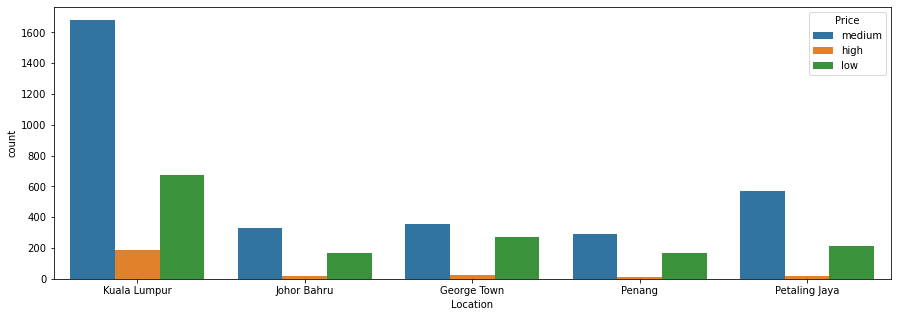

In [93]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Location', data = clean, hue = 'Price')
plt.show()

Since the dataset consists mostly Kuala Lumpur restaurants, KL tend to have higher frequency. Most high end restaurants appear in Kuala Lumpur, where as the other location has almost the same distribution. For medium restaurants, most of them are in KL, followed by Petaling Jaya. For lower priced restaurants, apart from KL, they appear more in George Town.

This tells that KL restaurants tend to be more towards the medium to high price. This make sense since KL is the capital city in which more demand are coming

## How does the rating varies between location?

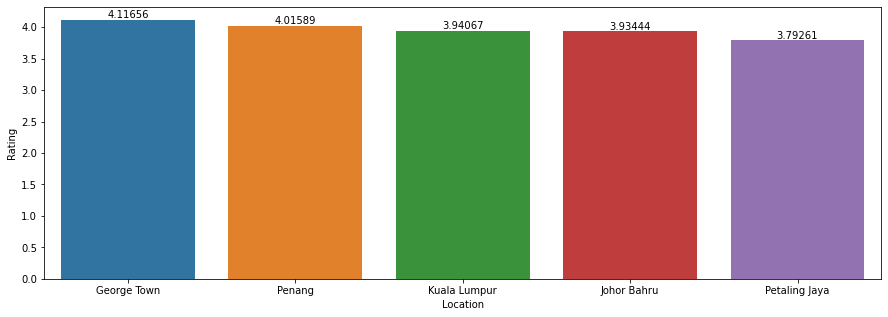

In [94]:
plt.figure(figsize = (15,5))
a1 = sns.barplot(x = 'Location', y = 'Rating', 
                 data = clean.groupby('Location').agg('mean').reset_index().sort_values(by = 'Rating', ascending = False))
for i in a1.containers:
    a1.bar_label(i,)
plt.show()

Barplot above shows that restaurant in george town have the highest average rating at 4.11, followed by penang at 4.01, KL at 3.94, JB at 3.93, and petaling jaya at 3.79

## Distribution of Rating to Price

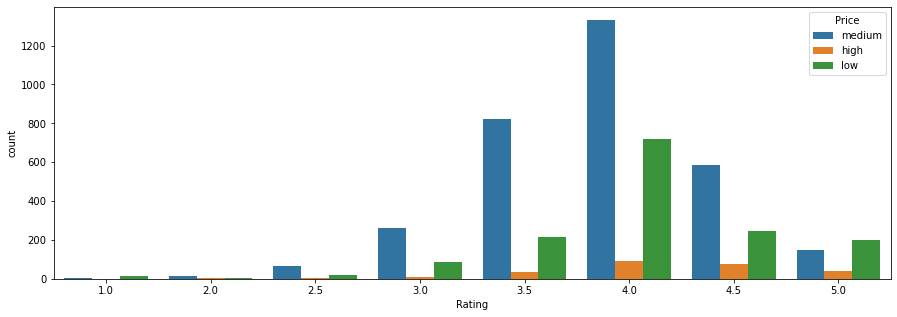

In [95]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Rating', data = clean, hue = 'Price')
plt.show()

- The rating distribution across all prices are similar, with most in the range of 4, followed by 3.5, and 4.5.
- Most high priced restaurant have rating no more less than 3.5
- Despite appearing lesser in the dataset, lower priced restaurant has more 5 rating compared to medium. However, this could be because of listings that have low total rating

This chart tells that to be priced higher, restaurant owner must provide excellent service which in turn will get them higher rating.

## Does the number of Total rating has impact on price?

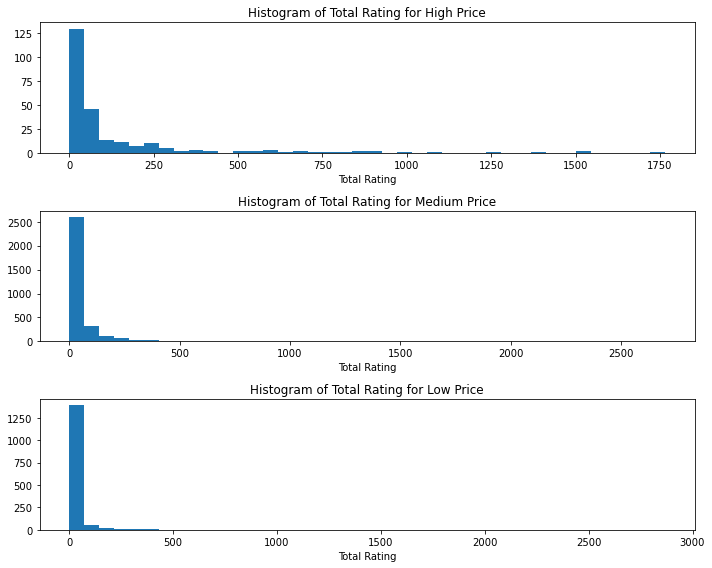

In [96]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,8), tight_layout = True)
ax1.hist(x = 'Total Rating', data = clean[clean['Price'] == 'high'], bins = 40)
ax2.hist(x = 'Total Rating', data = clean[(clean['Price'] == 'medium')], bins = 40)
ax3.hist(x = 'Total Rating', data = clean[clean['Price'] == 'low'], bins = 40)

ax1.set_title('Histogram of Total Rating for High Price')
ax1.set_xlabel('Total Rating')
ax2.set_title('Histogram of Total Rating for Medium Price')
ax2.set_xlabel('Total Rating')
ax3.set_title('Histogram of Total Rating for Low Price')
ax3.set_xlabel('Total Rating')
plt.show()

All three histogram shows similar trend where total rating usually is in range of 0 to 200 or 300. However, for higher priced restaurants, we can see that there are a lot more data points with 250+ total rating compared to both medium and low which have minimum points there.

This tells that restaurant that are more popular are able to price their meals higher as higher total rating means higher visits.

Hence, restaurant has to come up with effective strategies to attract more customers or keep their existing customers coming back. For instance, social media marketing campaign where customers can share their visit in return for free ice cream, etc.

## What is the Lower bound & Upper bound of price range between the three price category?

In [97]:
clean.groupby('Price').agg('mean')[['Price Lower', 'Price Upper']].reset_index()

,Price,Price Lower,Price Upper
0,high,101.716049,1139.530864
1,low,9.927765,35.187359
2,medium,27.623519,139.082954


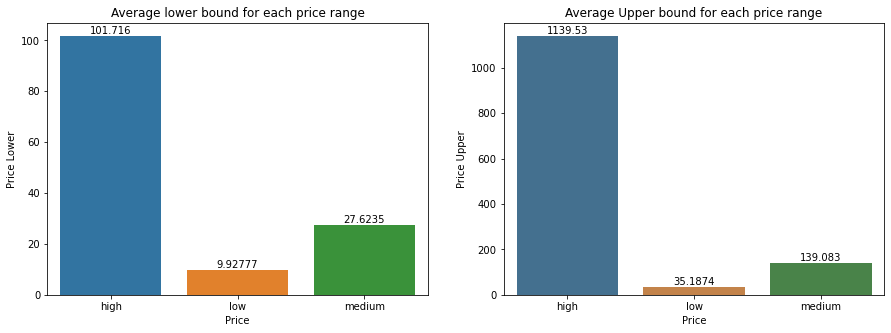

In [98]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5), tight_layout = False)

a1 = sns.barplot(x = 'Price', 
                 y = 'Price Lower', data = clean.groupby('Price').agg('mean')[['Price Lower', 'Price Upper']].reset_index(), ax = ax1)
for i in a1.containers:
    a1.bar_label(i,)
    
ax1.set_title('Average lower bound for each price range')

a2 = sns.barplot(x = 'Price', y = 'Price Upper', 
                 data = clean.groupby('Price').agg('mean')[['Price Lower', 'Price Upper']].reset_index(),
                 saturation= 0.5, ax = ax2)
for i in a2.containers:
    a2.bar_label(i,)

ax2.set_title('Average Upper bound for each price range')
plt.show()

Based on the existing data, here is the lower bound and upper bound of each Price category:
- High   = 101 - 1139
- Medium = 27 - 139
- Low    = 9.9 - 35

## Does the review sentiment score have impact on price?

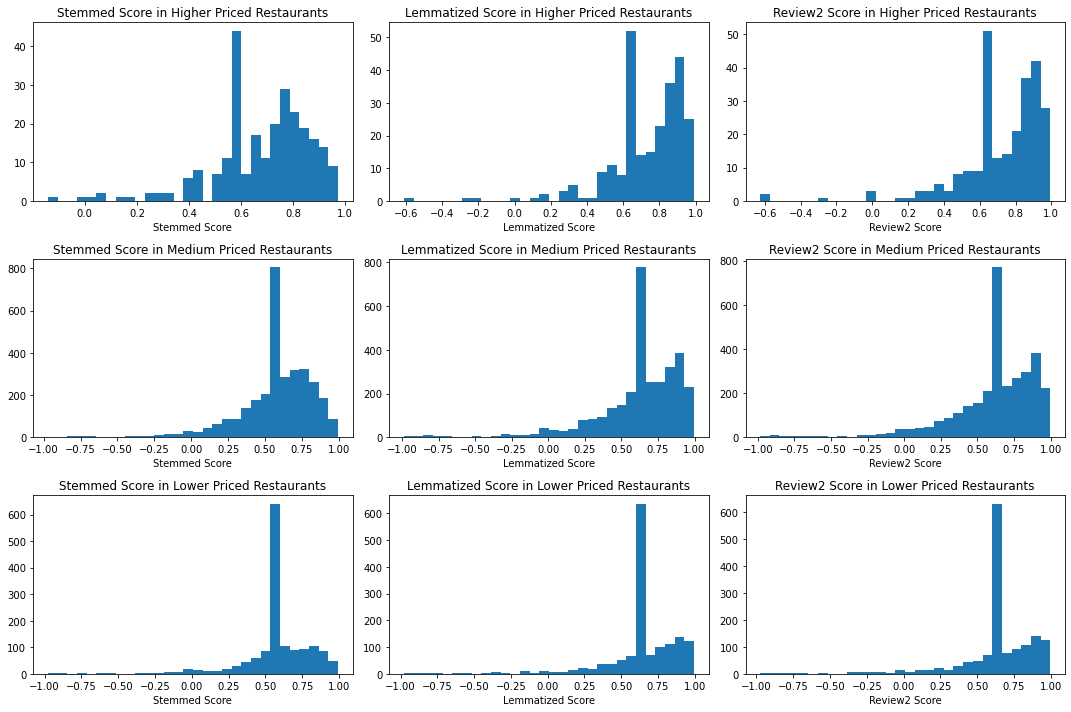

In [99]:
fig, (ax1,ax2,ax3) = plt.subplots(3,3, figsize = (15,10), tight_layout = True)
ax1[0].hist(x = 'Stemmed Score', data = clean[clean['Price'] == 'high'], bins = 30)
ax1[1].hist(x = 'Lemmatized Score', data = clean[clean['Price'] == 'high'], bins = 30)
ax1[2].hist(x = 'Review2 Score', data = clean[clean['Price'] == 'high'], bins = 30)

ax2[0].hist(x = 'Stemmed Score', data = clean[clean['Price'] == 'medium'], bins = 30)
ax2[1].hist(x = 'Lemmatized Score', data = clean[clean['Price'] == 'medium'], bins = 30)
ax2[2].hist(x = 'Review2 Score', data = clean[clean['Price'] == 'medium'], bins = 30)

ax3[0].hist(x = 'Stemmed Score', data = clean[clean['Price'] == 'low'], bins = 30)
ax3[1].hist(x = 'Lemmatized Score', data = clean[clean['Price'] == 'low'], bins = 30)
ax3[2].hist(x = 'Review2 Score', data = clean[clean['Price'] == 'low'], bins = 30)

ax1[0].set_title('Stemmed Score in Higher Priced Restaurants')
ax1[1].set_title('Lemmatized Score in Higher Priced Restaurants')
ax1[2].set_title('Review2 Score in Higher Priced Restaurants')
ax1[0].set_xlabel('Stemmed Score')
ax1[1].set_xlabel('Lemmatized Score')
ax1[2].set_xlabel('Review2 Score')

ax2[0].set_title('Stemmed Score in Medium Priced Restaurants')
ax2[1].set_title('Lemmatized Score in Medium Priced Restaurants')
ax2[2].set_title('Review2 Score in Medium Priced Restaurants')
ax2[0].set_xlabel('Stemmed Score')
ax2[1].set_xlabel('Lemmatized Score')
ax2[2].set_xlabel('Review2 Score')

ax3[0].set_title('Stemmed Score in Lower Priced Restaurants')
ax3[1].set_title('Lemmatized Score in Lower Priced Restaurants')
ax3[2].set_title('Review2 Score in Lower Priced Restaurants')
ax3[0].set_xlabel('Stemmed Score')
ax3[1].set_xlabel('Lemmatized Score')
ax3[2].set_xlabel('Review2 Score')

plt.show()

Histograms above shows that Stemming and Lemmatizating have slight difference where lemmatized review have slightly higher scores, and Review2 has very similar distribution to those in Lemmatized.

All histograms show quite similar saturation of scores which are mostly around 0.6. However, we can see clear difference between the price category as Higher priced restaurant show spike of saturation at around 0.8-0.9 (higher sentiment score), compared to medium priced restaurant with spike around 0.7-0.8 (slightly lower score compared to high), and lower priced restaurant showing less significant spike.

This shows that in general, most people do not leave very bad review to the listings. Besides, this shows that higher priced restaurant usually provide a very pleasant dining experience for customers. Hence, restaurant should focus on providing excellent service for their business to thrive.

## Is there any noticeable feature (Cuisine/Diet/Feature) which leads to specific price?

In [100]:
clean.groupby('Price').agg(sum)

,Rating,Total Rating,Price Lower,Price Upper,Stemmed Score,Lemmatized Score,Review2 Score,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
Price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high,1056.5,36681.0,16478.0,184604.0,173.088195,185.265406,182.711418,247,198,46,29,81,53,67,40,19,45,93,34,37,9,43,9,24,22,50,25,24,18,23,11,10,26,7,4,1,5,9,1,22,18,35,0,14,4,1,22,6,5,7,1,4,0,0,0,0,2,2,9,0,1,4,0,2,1,0,1,1,1,2,0,1,0,0,0,0,2,0,0,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,223,239,208,98,76,139,108,116,71,112,45,23,74,22,48,47,76,87,26,14,11,19,21,19,52,33,44,34,15,12,2,0,0,2,2,3,0,0,1
low,6051.5,65223.0,8796.0,31176.0,872.205560,948.950020,938.189615,1308,1356,385,362,197,106,142,91,113,14,1010,660,386,202,64,185,125,39,36,47,75,38,30,84,78,8,25,29,37,54,75,53,17,12,18,71,29,24,29,10,38,21,8,34,25,22,26,22,14,15,16,9,10,2,7,6,4,4,9,5,7,9,5,7,1,1,3,1,1,2,3,1,2,1,3,0,0,4,3,2,0,2,2,1,3,1,0,0,1,2,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,1291,1021,1051,1318,151,97,182,141,91,135,175,137,42,155,32,32,14,26,79,76,43,65,52,38,10,52,19,6,17,3,7,3,4,3,3,1,0,0,0
medium,12537.5,206305.0,30303.0,152574.0,1843.119419,1986.750604,1945.766656,3045,2895,816,583,539,344,760,387,363,132,1805,799,670,339,324,226,252,276,250,247,202,206,192,140,139,140,137,119,101,80,51,67,77,80,57,38,63,72,65,50,31,39,42,18,23,30,23,26,30,24,21,15,21,27,18,19,16,16,8,10,7,5,7,7,12,11,8,10,7,4,4,5,4,4,3,4,4,2,2,3,5,3,3,3,1,2,3,1,2,1,3,3,2,1,1,2,2,0,1,2,2,1,2,1,1,2,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,2826,2597,2443,2047,939,907,623,578,647,554,547,327,348,254,331,328,298,182,184,163,197,145,138,146,138,111,122,140,81,36,16,14,13,9,9,6,8,7,3


Since the dataset is highly imbalanced it is hard to view which features are important towards the price just based on the table.

Here are some key takeaways from the table:
- All meals (Dinner, Lunch, Brunch, etc) do not have significant effect towards the price
- All special diets (Vegetarian friendly, vegan options, halal, gluten free) do not have significant effect towards the price
- For cuisine type most of them follow the dataset distribution (Medium > Low > High), except these:
  - Medium > High > Low
    - Restaurants with cuisine type EUROPEAN is more likely to be priced medium or higher (250 medium, 50 high, 36 low)
    - Restaurants with cuisine type SUSHI is more likely to be priced medium or higher (140 medium, 28 high, 8 low)
    - Restaurants with cuisine type STEAKHOUSE is more likely to be priced medium or higher (77 medium, 22 high, 17 low)
    - Restaurants with cuisine type WINE BAR is more likely to be priced medium or higher (80 medium, 19 high, 12 low)
    - Restaurants with cuisine type FRENCH is more likely to be priced medium or higher (57 medium, 35 high, 18 low)
    - Restaurants with cuisine type contemporary is more likely to be priced medium or higher (50 medium, 22 high, 10 low)
    - ----------------------------------------------------------------------
    - Restaurants with feature type SERVES ALCOHOL is more likely to be priced medium or higher (907 medium, 143 high, 97 low)
    - Restaurants with feature type SERVES WINE AND BEER is more likely to be priced medium or higher (348 medium, 77 high, 42 low)
    - Restaurants with feature type ACCEPTS VISA is more likely to be priced medium or higher (331 medium, 48 high, 32 low)
    - Restaurants with feature type ACCEPTS MASTERCARD is more likely to be priced medium or higher (328 medium, 47 high, 32 low)
    - Restaurants with feature type FULL BAR is more likely to be priced medium or higher (298 medium, 77 high, 14 low)
    - Restaurants with feature type PRIVATE DINING is more likely to be priced medium or higher (183 medium, 91 high, 26 low)
    - ----------------------------------------------------------------------
  - Low >
    - Restaurants with cuisine types SOUTHWESTERN, FAST FOOD, ARABIC, STREET FOOD, INDONESIAN is more likely to be lower priced

## ----------------------------------------------------------------------------------------------------------------------------------

## Correlation and Chi-square test

In [101]:
clean[['Rating', 'Total Rating', 'Stemmed Score', 'Lemmatized Score', 'Review2 Score']].corr()

,Rating,Total Rating,Stemmed Score,Lemmatized Score,Review2 Score
Rating,1.000000,0.096127,0.384330,0.442345,0.446567
Total Rating,0.096127,1.000000,0.042022,0.042696,0.043036
Stemmed Score,0.384330,0.042022,1.000000,0.901954,0.874707
Lemmatized Score,0.442345,0.042696,0.901954,1.000000,0.969471
Review2 Score,0.446567,0.043036,0.874707,0.969471,1.000000


#### Since Lemmatized Score have better correlation with rating compared to Stemmed, this means Lemmatized score is more accurate. Moreover, using either Lemmatized Score or Review2 Score will be fine for the model since both are quite similar (0.96) correlation

In [102]:
clean.drop(columns = ['Stemmed Score', 'Price Lower', 'Price Upper', 'Review2 Score'], inplace = True)

In [103]:
clean

,Rating,Total Rating,Price,Location,Lemmatized Score,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
0,4.5,7.0,medium,Kuala Lumpur,0.593386,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,882.0,high,Kuala Lumpur,0.918213,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,4.5,1278.0,high,Kuala Lumpur,0.855820,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,4.5,1512.0,high,Kuala Lumpur,0.917933,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,5.0,1934.0,medium,Kuala Lumpur,0.866067,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [104]:
corrX = clean.drop(columns = ['Price', 'Rating', 'Total Rating', 'Lemmatized Score'])
corrX

,Location,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach
0,Kuala Lumpur,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kuala Lumpur,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,Kuala Lumpur,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,Kuala Lumpur,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,Kuala Lumpur,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [105]:
corrY = clean['Price']
corrY

0       medium
1         high
2         high
3         high
4       medium
         ...  
4973    medium
4974       low
4975       low
4976      high
4977    medium
Name: Price, Length: 4978, dtype: object

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [107]:
corrX = pd.get_dummies(data = corrX, columns = ['Location'])

In [108]:
corrX

,Dinner,Lunch,Brunch,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Fusion,Bar,European,Seafood,Italian,Pub,International,American,Thai,Sushi,Pizza,Barbecue,Korean,Middle Eastern,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Mediterranean,Soups,Contemporary,Arabic,British,Spanish,Street Food,Diner,Taiwanese,Indonesian,Vietnamese,Mexican,Australian,Pakistani,Japanese Fusion,Lebanese,Gastropub,Dining bars,Deli,Beer restaurants,German,Singaporean,South American,Sri Lankan,Turkish,Caucasian,Central Asian,Irish,Latin,Moroccan,Portuguese,Persian,Central-Italian,Eastern European,Brew Pub,Afghan,Central European,Brazilian,Southern-Italian,Argentinian,Bangladeshi,African,Philippine,Central American,Belgian,Egyptian,Cajun & Creole,Hawaiian,New Zealand,Swiss,Kaiseki,Latvian,Japanese sweets parlour,Campania,Neapolitan,Nepalese,Dutch,Greek,Fujian,Danish,Cambodian,Russian,Swedish,Catalan,Mongolian,Tuscan,Sicilian,Caribbean,Scandinavian,Shojin,Sardinian,Colombian,Armenian,Hokkaido cuisine,Algerian,Austrian,Georgian,Chilean,Ethiopian,Kyoto cuisine,Lazio,Northern-Italian,Burmese,Xinjiang,Romana,Hungarian,Peruvian,Native American,Canadian,Slovenian,Yunnan,Venezuelan,Kappo,Scottish,Seating,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Street Parking,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Cash Only,Television,Free off-street parking,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Dog Friendly,Waterfront,BYOB,Jazz Bar,Drive Thru,Sports bars,Accepts Discover,Playgrounds,Beach,Location_George Town,Location_Johor Bahru,Location_Kuala Lumpur,Location_Penang,Location_Petaling Jaya
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [109]:
#Chi scores for input variables against the Price
chi_scores = chi2(corrX,corrY)
chi_scores

(array([6.35584835e+00, 3.96104161e+00, 5.20561585e+00, 2.83663435e+01,
        4.70191295e+01, 4.37689940e+01, 1.10982689e+02, 4.19150820e+01,
        1.58555347e+01, 1.61004166e+02, 4.45836760e+01, 1.51102727e+02,
        1.81938671e+01, 2.17833086e+01, 6.05944039e+01, 4.21042429e+01,
        9.95163238e-01, 5.50456158e+01, 1.09752358e+02, 3.76026722e+01,
        7.81165731e+00, 3.05496317e+01, 4.17688673e+01, 3.54227380e+00,
        2.01901586e+00, 7.72354211e+01, 2.03908960e+01, 1.22425787e+01,
        7.12805473e+00, 5.26237502e+00, 4.48684491e+01, 1.35208205e+01,
        5.29411591e+01, 4.18810752e+01, 1.63628016e+02, 6.50318182e+01,
        1.43826881e+01, 2.28247603e+00, 3.25289358e+00, 8.47882998e+01,
        1.81234893e+01, 1.18819523e+00, 1.13457794e+01, 2.92387119e+01,
        9.64752936e+00, 5.62529820e+00, 1.34788088e+01, 7.22409889e+00,
        2.36595221e+00, 8.21604545e-01, 2.26286383e+00, 3.37807907e+01,
        1.67098764e+00, 8.60471608e+00, 4.66942416e+00, 2.071159

In [110]:
p_values = pd.Series(chi_scores[1],index = corrX.columns)
p_values.sort_values(ascending = False , inplace = True)

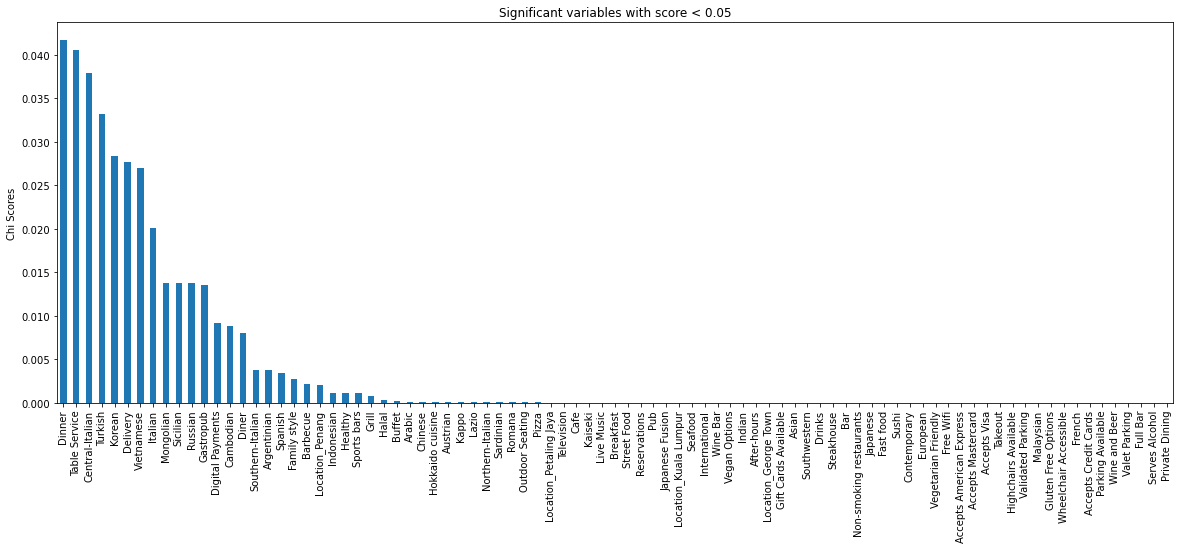

In [111]:
#Plot of significant variables, score < 0.05
plt.figure(figsize = (20,7))
plt.ylabel('Chi Scores')
p_values[p_values < 0.05].plot.bar()
plt.title('Significant variables with score < 0.05')
plt.show()

In [112]:
p_values[p_values < 0.05].reset_index()

,index,0
0,Dinner,4.167207e-02
1,Table Service,4.052576e-02
2,Central-Italian,3.787771e-02
3,Turkish,3.317485e-02
4,Korean,2.832452e-02
...,...,...
82,Wine and Beer,2.029755e-40
83,Valet Parking,4.123708e-47
84,Full Bar,6.611542e-57
85,Serves Alcohol,1.218681e-71


In [113]:
chi2_selector = SelectKBest(chi2, k=87)
X_kbest = chi2_selector.fit_transform(corrX, corrY)

## Top 87 variable

In [114]:
chi2_selector.get_feature_names_out()

array(['Dinner', 'Breakfast', 'Drinks', 'After-hours',
       'Vegetarian Friendly', 'Vegan Options', 'Halal',
       'Gluten Free Options', 'Asian', 'Malaysian', 'Chinese', 'Cafe',
       'Japanese', 'Indian', 'Bar', 'European', 'Seafood', 'Italian',
       'Pub', 'International', 'Sushi', 'Pizza', 'Barbecue', 'Korean',
       'Southwestern', 'Healthy', 'Steakhouse', 'Wine Bar', 'French',
       'Fast food', 'Grill', 'Contemporary', 'Arabic', 'Spanish',
       'Street Food', 'Diner', 'Indonesian', 'Vietnamese',
       'Japanese Fusion', 'Gastropub', 'Turkish', 'Central-Italian',
       'Southern-Italian', 'Argentinian', 'Kaiseki', 'Cambodian',
       'Russian', 'Mongolian', 'Sicilian', 'Sardinian',
       'Hokkaido cuisine', 'Austrian', 'Lazio', 'Northern-Italian',
       'Romana', 'Kappo', 'Reservations', 'Table Service', 'Takeout',
       'Wheelchair Accessible', 'Serves Alcohol', 'Free Wifi',
       'Parking Available', 'Highchairs Available',
       'Accepts Credit Cards', 'Outdoo

In [115]:
chi2_selector.get_feature_names_out()[:-4]

array(['Dinner', 'Breakfast', 'Drinks', 'After-hours',
       'Vegetarian Friendly', 'Vegan Options', 'Halal',
       'Gluten Free Options', 'Asian', 'Malaysian', 'Chinese', 'Cafe',
       'Japanese', 'Indian', 'Bar', 'European', 'Seafood', 'Italian',
       'Pub', 'International', 'Sushi', 'Pizza', 'Barbecue', 'Korean',
       'Southwestern', 'Healthy', 'Steakhouse', 'Wine Bar', 'French',
       'Fast food', 'Grill', 'Contemporary', 'Arabic', 'Spanish',
       'Street Food', 'Diner', 'Indonesian', 'Vietnamese',
       'Japanese Fusion', 'Gastropub', 'Turkish', 'Central-Italian',
       'Southern-Italian', 'Argentinian', 'Kaiseki', 'Cambodian',
       'Russian', 'Mongolian', 'Sicilian', 'Sardinian',
       'Hokkaido cuisine', 'Austrian', 'Lazio', 'Northern-Italian',
       'Romana', 'Kappo', 'Reservations', 'Table Service', 'Takeout',
       'Wheelchair Accessible', 'Serves Alcohol', 'Free Wifi',
       'Parking Available', 'Highchairs Available',
       'Accepts Credit Cards', 'Outdoo

In [116]:
inputNames = list(clean.iloc[:,:5])
inputNames.extend(chi2_selector.get_feature_names_out()[:-4])
len(inputNames)

88

In [117]:
clean = clean[inputNames]

In [118]:
clean

,Rating,Total Rating,Price,Location,Lemmatized Score,Dinner,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Bar,European,Seafood,Italian,Pub,International,Sushi,Pizza,Barbecue,Korean,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Contemporary,Arabic,Spanish,Street Food,Diner,Indonesian,Vietnamese,Japanese Fusion,Gastropub,Turkish,Central-Italian,Southern-Italian,Argentinian,Kaiseki,Cambodian,Russian,Mongolian,Sicilian,Sardinian,Hokkaido cuisine,Austrian,Lazio,Northern-Italian,Romana,Kappo,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Television,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Sports bars
0,4.5,7.0,medium,Kuala Lumpur,0.593386,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,5.0,882.0,high,Kuala Lumpur,0.918213,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0
2,4.5,1278.0,high,Kuala Lumpur,0.855820,1,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0
3,4.5,1512.0,high,Kuala Lumpur,0.917933,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0
4,5.0,1934.0,medium,Kuala Lumpur,0.866067,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,4.0,62.0,medium,Petaling Jaya,0.626952,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4974,4.0,62.0,low,Petaling Jaya,0.626952,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4975,4.0,62.0,low,Petaling Jaya,0.626952,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4976,4.0,62.0,high,Petaling Jaya,0.626952,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0


In [119]:
clean = pd.get_dummies(data = clean, columns = ['Location']).drop(columns = 'Location_Johor Bahru')
#Johor Bahru dropped because not significant

In [120]:
clean

,Rating,Total Rating,Price,Lemmatized Score,Dinner,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Bar,European,Seafood,Italian,Pub,International,Sushi,Pizza,Barbecue,Korean,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Contemporary,Arabic,Spanish,Street Food,Diner,Indonesian,Vietnamese,Japanese Fusion,Gastropub,Turkish,Central-Italian,Southern-Italian,Argentinian,Kaiseki,Cambodian,Russian,Mongolian,Sicilian,Sardinian,Hokkaido cuisine,Austrian,Lazio,Northern-Italian,Romana,Kappo,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Accepts Credit Cards,Outdoor Seating,Wine and Beer,Delivery,Accepts Visa,Accepts Mastercard,Full Bar,Private Dining,Digital Payments,Television,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Accepts American Express,Live Music,Gift Cards Available,Sports bars,Location_George Town,Location_Kuala Lumpur,Location_Penang,Location_Petaling Jaya
0,4.5,7.0,medium,0.593386,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,5.0,882.0,high,0.918213,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0
2,4.5,1278.0,high,0.855820,1,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
3,4.5,1512.0,high,0.917933,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0
4,5.0,1934.0,medium,0.866067,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,4.0,62.0,medium,0.626952,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4974,4.0,62.0,low,0.626952,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4975,4.0,62.0,low,0.626952,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4976,4.0,62.0,high,0.626952,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1


## Merging similar columns to one

In [121]:
clean['Accept Cards'] = None

In [122]:
for x in range(len(clean)):
    # Merge credit cards
    z = (clean.loc[x,'Accepts Credit Cards'] or clean.loc[x,'Accepts Visa'] or clean.loc[x,'Accepts Mastercard'] or clean.loc[x, 'Accepts American Express'])
    clean.loc[x,'Accept Cards'] = z

In [123]:
clean.drop(columns = ['Accepts Credit Cards', 'Accepts Visa', 'Accepts Mastercard', 'Accepts American Express'], inplace = True)

In [124]:
clean

,Rating,Total Rating,Price,Lemmatized Score,Dinner,Breakfast,Drinks,After-hours,Vegetarian Friendly,Vegan Options,Halal,Gluten Free Options,Asian,Malaysian,Chinese,Cafe,Japanese,Indian,Bar,European,Seafood,Italian,Pub,International,Sushi,Pizza,Barbecue,Korean,Southwestern,Healthy,Steakhouse,Wine Bar,French,Fast food,Grill,Contemporary,Arabic,Spanish,Street Food,Diner,Indonesian,Vietnamese,Japanese Fusion,Gastropub,Turkish,Central-Italian,Southern-Italian,Argentinian,Kaiseki,Cambodian,Russian,Mongolian,Sicilian,Sardinian,Hokkaido cuisine,Austrian,Lazio,Northern-Italian,Romana,Kappo,Reservations,Table Service,Takeout,Wheelchair Accessible,Serves Alcohol,Free Wifi,Parking Available,Highchairs Available,Outdoor Seating,Wine and Beer,Delivery,Full Bar,Private Dining,Digital Payments,Television,Family style,Buffet,Valet Parking,Non-smoking restaurants,Validated Parking,Live Music,Gift Cards Available,Sports bars,Location_George Town,Location_Kuala Lumpur,Location_Penang,Location_Petaling Jaya,Accept Cards
0,4.5,7.0,medium,0.593386,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1,5.0,882.0,high,0.918213,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
2,4.5,1278.0,high,0.855820,1,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1
3,4.5,1512.0,high,0.917933,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1
4,5.0,1934.0,medium,0.866067,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,4.0,62.0,medium,0.626952,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4974,4.0,62.0,low,0.626952,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4975,4.0,62.0,low,0.626952,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4976,4.0,62.0,high,0.626952,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1


## Data is mostly skewed, normalization needed

D:\Daniel\envs\flask\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

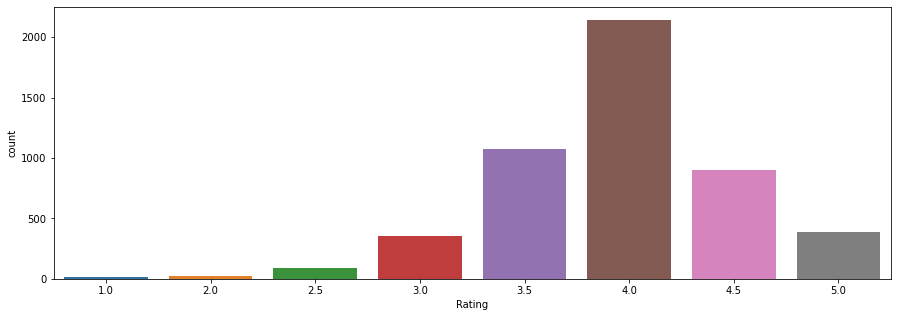

In [125]:
plt.figure(figsize = (15,5))
sns.countplot(clean['Rating'])

<AxesSubplot:xlabel='Total Rating', ylabel='Count'>

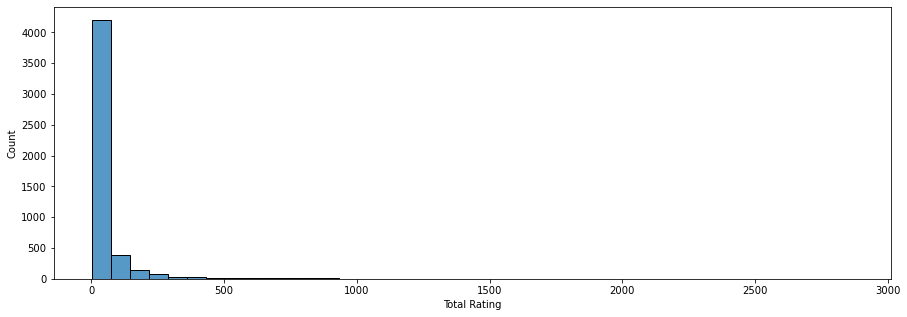

In [126]:
plt.figure(figsize = (15,5))
sns.histplot(clean['Total Rating'], bins = 40)

<AxesSubplot:xlabel='Lemmatized Score', ylabel='Count'>

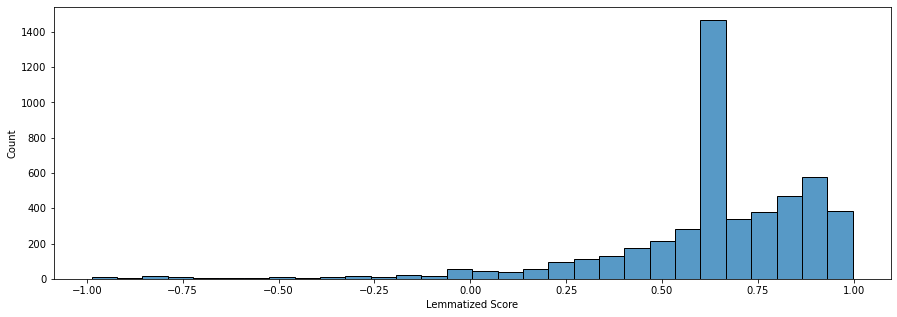

In [127]:
plt.figure(figsize = (15,5))
sns.histplot(clean['Lemmatized Score'], bins = 30)

In [128]:
clean['Price'].value_counts()

medium    3225
low       1499
high       254
Name: Price, dtype: int64

In [129]:
#encoding for training
def encodePrice(price):
    if price == 'high':
        return 2
    elif price == 'medium':
        return 1
    else:
        return 0

In [130]:
clean['Price'] = list(map(encodePrice, clean['Price']))

## Data Imbalance

D:\Daniel\envs\flask\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='count'>

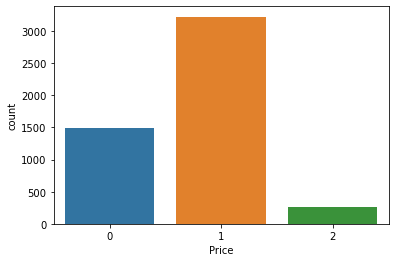

In [131]:
# Data imbalance
sns.countplot(clean['Price'])

In [132]:
# Input
X = clean.drop(columns = 'Price')

In [133]:
# Output
Y = clean['Price']

## Oversampling with SMOTE and Feature Scaling (Normalization)

In [134]:
# Perform Over Sampling
from imblearn.over_sampling import SMOTE
X, Y = SMOTE(random_state = 123).fit_resample(X,Y)

D:\Daniel\envs\flask\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='count'>

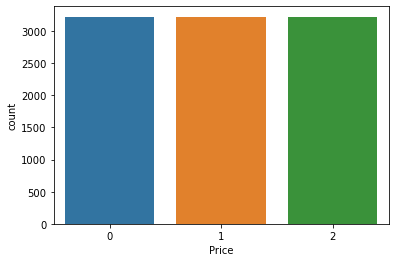

In [135]:
sns.countplot(Y)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

In [137]:
# Because the data is skewed, normalization is performed (min-max)
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [138]:
#Saving the scaling parameter
from pickle import dump
dump(norm, open('scaler.pkl', 'wb'))

In [139]:
print("Length of train set: ", X_train.shape, "y:", Y_train.shape)
print("Length of test set: ", X_test.shape, "y:", Y_test.shape)

Length of train set:  (6772, 87) y: (6772,)
Length of test set:  (2903, 87) y: (2903,)


# Model Training

In [139]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
# Models 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV

# Model Performance Metrics Function
def cross_val(model):
    accuracies=cross_val_score(estimator=model,X=X_train,y=Y_train,cv=5)
    print(accuracies)
    return accuracies.mean()*100

def fit_evaluate(model):
    name=model.__class__.__name__
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    cross=cross_val(model)
    a_s=accuracy_score(Y_test,y_pred)*100
    pre_sc_mi=precision_score(Y_test,y_pred, average ='micro')*100
    pre_sc_ma=precision_score(Y_test,y_pred, average ='macro')*100
    rec_sc_mi=recall_score(Y_test,y_pred, average ='micro')*100
    rec_sc_ma=recall_score(Y_test,y_pred, average ='macro')*100
    f1_sc_mi=f1_score(Y_test,y_pred, average = 'micro')*100
    f1_sc_ma=f1_score(Y_test,y_pred, average = 'macro')*100
    
    result=pd.DataFrame([[name,cross,a_s,pre_sc_mi,pre_sc_ma,rec_sc_mi,rec_sc_ma,f1_sc_mi,f1_sc_ma]],
                        columns=['model','accuracy_train_cv','accuracy_test','precision_score_micro','precision_score_macro','recall_score_micro','recall_score_macro','f1_score_micro','f1_score_macro'])
    return result

In [140]:
# Models Performance Metrics Comparison
SVC = SVC()
XGB = XGBClassifier(random_state = 123)
DT = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
RF = RandomForestClassifier(random_state = 123)
ADAB = AdaBoostClassifier()
GB = GradientBoostingClassifier()
models=[SVC,XGB,DT,KNN,RF,ADAB,GB]

result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score_micro','precision_score_macro','recall_score_micro','recall_score_macro','f1_score_micro','f1_score_macro'])
for model in models:
  print(model.__class__.__name__)
  results = fit_evaluate(model)
  result_models=pd.concat([result_models,results])
result_models.sort_values(by='accuracy_test',ascending=False)

SVC
[0.78745387 0.77933579 0.79763663 0.78581979 0.77695716]
XGBClassifier
[0.85535055 0.84723247 0.84121123 0.84416544 0.84416544]
DecisionTreeClassifier
[0.79704797 0.78819188 0.79246677 0.78951256 0.77031019]
KNeighborsClassifier
[0.74095941 0.74391144 0.75184638 0.74076809 0.7282127 ]
RandomForestClassifier
[0.85461255 0.8501845  0.84564254 0.85598227 0.84121123]
AdaBoostClassifier
[0.76309963 0.76678967 0.76661743 0.74889217 0.75849335]
GradientBoostingClassifier
[0.80664207 0.81402214 0.80132939 0.81314623 0.80576071]


,model,accuracy_train_cv,accuracy_test,precision_score_micro,precision_score_macro,recall_score_micro,recall_score_macro,f1_score_micro,f1_score_macro
0,XGBClassifier,84.642502,85.704444,85.704444,85.686562,85.704444,85.729585,85.704444,85.703751
0,RandomForestClassifier,84.952662,85.118843,85.118843,85.063289,85.118843,85.148852,85.118843,85.08609
0,GradientBoostingClassifier,80.818011,80.675164,80.675164,80.830362,80.675164,80.696494,80.675164,80.697273
0,SVC,78.544065,78.883913,78.883913,78.889834,78.883913,78.923538,78.883913,78.725617
0,DecisionTreeClassifier,78.750587,78.367206,78.367206,78.280346,78.367206,78.411463,78.367206,78.230359
0,AdaBoostClassifier,76.077845,76.920427,76.920427,77.204362,76.920427,76.951075,76.920427,76.78652
0,KNeighborsClassifier,74.113961,75.680331,75.680331,76.62712,75.680331,75.735597,75.680331,74.882625


In [141]:
print('For test')
rf_pred = RF.predict(X_test)
print(confusion_matrix(Y_test,rf_pred))
print(classification_report(Y_test,rf_pred))

print('RF Training Accuracy with CV')
accuracies=cross_val_score(estimator=RF,X=X_train,y=Y_train,cv=5)
print(accuracies)
print(accuracies.mean() * 100)

For test
[[796 127  48]
 [157 773  41]
 [ 28  31 902]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       971
           1       0.83      0.80      0.81       971
           2       0.91      0.94      0.92       961

    accuracy                           0.85      2903
   macro avg       0.85      0.85      0.85      2903
weighted avg       0.85      0.85      0.85      2903

RF Training Accuracy with CV
[0.85461255 0.8501845  0.84564254 0.85598227 0.84121123]
84.95266178658832


In [142]:
print('For test')
xgb_pred = XGB.predict(X_test)
print(confusion_matrix(Y_test,xgb_pred))
print(classification_report(Y_test,xgb_pred))

print('XGB Training Accuracy with CV')
accuracies=cross_val_score(estimator=XGB,X=X_train,y=Y_train,cv=5)
print(accuracies)
print(accuracies.mean() * 100)

For test
[[789 132  50]
 [136 805  30]
 [ 27  40 894]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       971
           1       0.82      0.83      0.83       971
           2       0.92      0.93      0.92       961

    accuracy                           0.86      2903
   macro avg       0.86      0.86      0.86      2903
weighted avg       0.86      0.86      0.86      2903

XGB Training Accuracy with CV
[0.85535055 0.84723247 0.84121123 0.84416544 0.84416544]
84.64250246638359


## Best Model is between RF or XGB

### Random Forest - Before Tuning

In [143]:
rf = RandomForestClassifier(random_state = 123)
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)
print("Random Forest performance before tuning")
print (confusion_matrix(Y_test,rf_pred))
print(classification_report(Y_test,rf_pred))

Random Forest performance before tuning
[[796 127  48]
 [157 773  41]
 [ 28  31 902]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       971
           1       0.83      0.80      0.81       971
           2       0.91      0.94      0.92       961

    accuracy                           0.85      2903
   macro avg       0.85      0.85      0.85      2903
weighted avg       0.85      0.85      0.85      2903



In [144]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

### Random Forest - Tuning

In [145]:
param_grid = {
    'max_depth': [20, 30, 40],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini']
}

#Use GridSearch
tunedrf = GridSearchCV(rf, param_grid = param_grid, cv=5, verbose = 2)
tunedrf.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.6s
[CV] E

[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_s

[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=3, min_sampl

[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_s

[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_sam

[CV] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=1, n_estimators=50; total time=   0.3s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=1, n_estimators=50; total time=   0.3s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=1, min_sam

[CV] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, n_estimators=150; total time=   0.8s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=2, min_s

[CV] END criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=1, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=3, min_sampl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini'], 'max_depth': [20, 30, 40],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [146]:
tunedrf_predictions = tunedrf.predict(X_test)
print(confusion_matrix(Y_test,tunedrf_predictions))
print(classification_report(Y_test,tunedrf_predictions))

[[792 130  49]
 [153 775  43]
 [ 27  35 899]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       971
           1       0.82      0.80      0.81       971
           2       0.91      0.94      0.92       961

    accuracy                           0.85      2903
   macro avg       0.85      0.85      0.85      2903
weighted avg       0.85      0.85      0.85      2903



In [147]:
tunedrf.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 150}

### XGBoost - Before Tuning

In [148]:
xgb = XGBClassifier(random_state = 123)
xgb.fit(X_train,Y_train)
xgb_pred = xgb.predict(X_test)
print("Random Forest performance before tuning")
print (confusion_matrix(Y_test,xgb_pred))
print(classification_report(Y_test,xgb_pred))

Random Forest performance before tuning
[[789 132  50]
 [136 805  30]
 [ 27  40 894]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       971
           1       0.82      0.83      0.83       971
           2       0.92      0.93      0.92       961

    accuracy                           0.86      2903
   macro avg       0.86      0.86      0.86      2903
weighted avg       0.86      0.86      0.86      2903



In [149]:
xgb.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### XGBoost - Tuning

In [150]:
params={
    'n_estimators':[300,400],
    'max_depth':[20,25,30],
    'learning_rate':[0.05,0.1,0.2],
    'subsample':[0.8],
    'alpha': [0]
}

#Use GridSearch
tunedxgb = GridSearchCV(xgb, param_grid = params, cv=5, verbose = 2)
tunedxgb.fit(X_train,Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END alpha=0, learning_rate=0.05, max_depth=20, n_estimators=300, subsample=0.8; total time=  10.3s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, n_estimators=300, subsample=0.8; total time=  11.6s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, n_estimators=300, subsample=0.8; total time=  11.4s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, n_estimators=300, subsample=0.8; total time=  11.5s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, n_estimators=300, subsample=0.8; total time=  11.6s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, n_estimators=400, subsample=0.8; total time=  14.7s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, n_estimators=400, subsample=0.8; total time=  14.8s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, n_estimators=400, subsample=0.8; total time=  14.9s
[CV] END alpha=0, learning_rate=0.05, max_depth=20, n_estimators=400, subsample=0.8; total time=  14.7s
[CV

[CV] END alpha=0, learning_rate=0.2, max_depth=25, n_estimators=400, subsample=0.8; total time=  11.4s
[CV] END alpha=0, learning_rate=0.2, max_depth=30, n_estimators=300, subsample=0.8; total time=   8.9s
[CV] END alpha=0, learning_rate=0.2, max_depth=30, n_estimators=300, subsample=0.8; total time=   9.3s
[CV] END alpha=0, learning_rate=0.2, max_depth=30, n_estimators=300, subsample=0.8; total time=   9.0s
[CV] END alpha=0, learning_rate=0.2, max_depth=30, n_estimators=300, subsample=0.8; total time=   8.9s
[CV] END alpha=0, learning_rate=0.2, max_depth=30, n_estimators=300, subsample=0.8; total time=   9.2s
[CV] END alpha=0, learning_rate=0.2, max_depth=30, n_estimators=400, subsample=0.8; total time=  11.1s
[CV] END alpha=0, learning_rate=0.2, max_depth=30, n_estimators=400, subsample=0.8; total time=  11.4s
[CV] END alpha=0, learning_rate=0.2, max_depth=30, n_estimators=400, subsample=0.8; total time=  11.0s
[CV] END alpha=0, learning_rate=0.2, max_depth=30, n_estimators=400, subs

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'alpha': [0], 'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [20, 25, 30], 'n_estimators': [300, 400],
                         'subsample': [0.8]},
             verbose=2)

In [151]:
tunedxgb_predictions = tunedxgb.predict(X_test)
print(confusion_matrix(Y_test,tunedxgb_predictions))
print(classification_report(Y_test,tunedxgb_predictions))

[[795 135  41]
 [137 806  28]
 [ 23  41 897]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       971
           1       0.82      0.83      0.83       971
           2       0.93      0.93      0.93       961

    accuracy                           0.86      2903
   macro avg       0.86      0.86      0.86      2903
weighted avg       0.86      0.86      0.86      2903



In [152]:
tunedxgb.best_estimator_.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.05,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 30,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'alpha': 0}

In [153]:
tunedxgb.best_params_

{'alpha': 0,
 'learning_rate': 0.05,
 'max_depth': 30,
 'n_estimators': 300,
 'subsample': 0.8}

In [154]:
feature_df=pd.DataFrame({'feature':X.columns,'importance':tunedxgb.best_estimator_.feature_importances_})
feature_df.sort_values(by='importance',ascending=False).head(20)

,feature,importance
61,Takeout,0.109528
63,Serves Alcohol,0.057403
81,Sports bars,0.044684
86,Accept Cards,0.032300
59,Reservations,0.029064
62,Wheelchair Accessible,0.026135
73,Television,0.019025
11,Asian,0.019010
7,Vegetarian Friendly,0.018537
0,Rating,0.018322


In [155]:
tuned = tunedxgb.best_estimator_
tuned

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [156]:
import pickle
pickle_out = open("xgbmodel.pkl","wb")
pickle.dump(tuned, pickle_out)
pickle_out.close()
#tunedxgb.best_estimator_.save_model("xgb_best_model.json")


In [157]:
X.columns

Index(['Rating', 'Total Rating', 'Lemmatized Score', 'Dinner', 'Breakfast',
       'Drinks', 'After-hours', 'Vegetarian Friendly', 'Vegan Options',
       'Halal', 'Gluten Free Options', 'Asian', 'Malaysian', 'Chinese', 'Cafe',
       'Japanese', 'Indian', 'Bar', 'European', 'Seafood', 'Italian', 'Pub',
       'International', 'Sushi', 'Pizza', 'Barbecue', 'Korean', 'Southwestern',
       'Healthy', 'Steakhouse', 'Wine Bar', 'French', 'Fast food', 'Grill',
       'Contemporary', 'Arabic', 'Spanish', 'Street Food', 'Diner',
       'Indonesian', 'Vietnamese', 'Japanese Fusion', 'Gastropub', 'Turkish',
       'Central-Italian', 'Southern-Italian', 'Argentinian', 'Kaiseki',
       'Cambodian', 'Russian', 'Mongolian', 'Sicilian', 'Sardinian',
       'Hokkaido cuisine', 'Austrian', 'Lazio', 'Northern-Italian', 'Romana',
       'Kappo', 'Reservations', 'Table Service', 'Takeout',
       'Wheelchair Accessible', 'Serves Alcohol', 'Free Wifi',
       'Parking Available', 'Highchairs Available',